# PcG bodies

In [18]:
library('ggplot2')
library('DESeq2')
library('dplyr')
library('tidyr')
library('ggrepel')
library('ashr')
library('data.table')
library('pheatmap')
library('RColorBrewer')
library('tibble')
library('DEqMS')
library('ggpubr')
library('ggridges')

## new EZH2 distance

In [103]:
df <- read.table("../20240529_EZH2_distance.tsv", fill=TRUE, header=TRUE, quote="", sep="\t", encoding="UTF-8")

In [104]:
df %>% str()

'data.frame':	19220 obs. of  17 variables:
 $ Q21_rep1   : chr  "0,24453" "0,38084" "0,22499" "0,29166" ...
 $ Q21_rep2   : chr  "0,53739" "0,45153" "0,63698" "0,56671" ...
 $ Q21_rep3   : chr  "0,67007" "0,62505" "0,43068" "0,47986" ...
 $ Q21_rep4   : chr  "0,71125" "0,37663" "0,80496" "0,5632" ...
 $ Q107_rep1  : chr  "0,82039" "0,72822" "0,65778" "0,35468" ...
 $ Q107_rep2  : chr  "0,28872" "0,77111" "0,4608" "0,47411" ...
 $ Q107_rep3  : chr  "0,68203" "0,30842" "0,22633" "0,45773" ...
 $ Q107_rep4  : chr  "0,71278" "0,46541" "0,2691" "0,27608" ...
 $ Q107_rep5  : chr  "0,68967" "0,63227" "0,67313" "0,70515" ...
 $ Q107_rep6  : chr  "0,40853" "0,44312" "0,54697" "0,64101" ...
 $ Q107_rep7  : chr  "0,30587" "0,60509" "0,33474" "0,77923" ...
 $ Q107_rep8  : chr  "0,42462" "0,49149" "0,80273" "0,4828" ...
 $ Q107CI_rep1: chr  "0,77678" "0,63362" "0,80845" "0,40598" ...
 $ Q107CI_rep2: chr  "0,57906" "0,83744" "0,60653" "0,72219" ...
 $ Q107CI_rep3: chr  "0,64877" "0,53031" "0,42739" 

In [105]:
columns2numeric <- colnames(df)

In [106]:
for (i in columns2numeric){
  df[[i]] <- as.numeric(sub(",", ".", df[[i]], fixed = TRUE))

}

In [107]:
df_longer <- df %>%
  pivot_longer(cols = everything(), 
               names_to = c(".value", "Condition"), 
               names_sep = "_")

In [108]:
df_longer

Condition,Q21,Q107,Q107CI
<chr>,<dbl>,<dbl>,<dbl>
rep1,0.24453,0.82039,0.77678
rep2,0.53739,0.28872,0.57906
rep3,0.67007,0.68203,0.64877
rep4,0.71125,0.71278,0.78663
rep5,NA,0.68967,0.80287
rep6,NA,0.40853,NA
rep7,NA,0.30587,NA
rep8,NA,0.42462,NA
rep1,0.38084,0.72822,0.63362


In [109]:
df_temp <- df_longer %>% pivot_longer(c('Q21','Q107','Q107CI'), names_to = 'genotype')
head(df_temp)

Condition,genotype,value
<chr>,<chr>,<dbl>
rep1,Q21,0.24453
rep1,Q107,0.82039
rep1,Q107CI,0.77678
rep2,Q21,0.53739
rep2,Q107,0.28872
rep2,Q107CI,0.57906


In [110]:
df_temp$bin <- ifelse(df_temp$value <= 0.3 , 'zone1',
                      ifelse(df_temp$value > 0.3 & df_temp$value <= 0.6 , 'zone2', 'zone3'))    


In [111]:
sum(is.na(df_temp))

[1] 697794

In [112]:
df_final <- df_temp %>% drop_na()

In [113]:
df_final %>% head

Condition,genotype,value,bin
<chr>,<chr>,<dbl>,<chr>
rep1,Q21,0.24453,zone1
rep1,Q107,0.82039,zone3
rep1,Q107CI,0.77678,zone3
rep2,Q21,0.53739,zone2
rep2,Q107,0.28872,zone1
rep2,Q107CI,0.57906,zone2


[1] FALSE


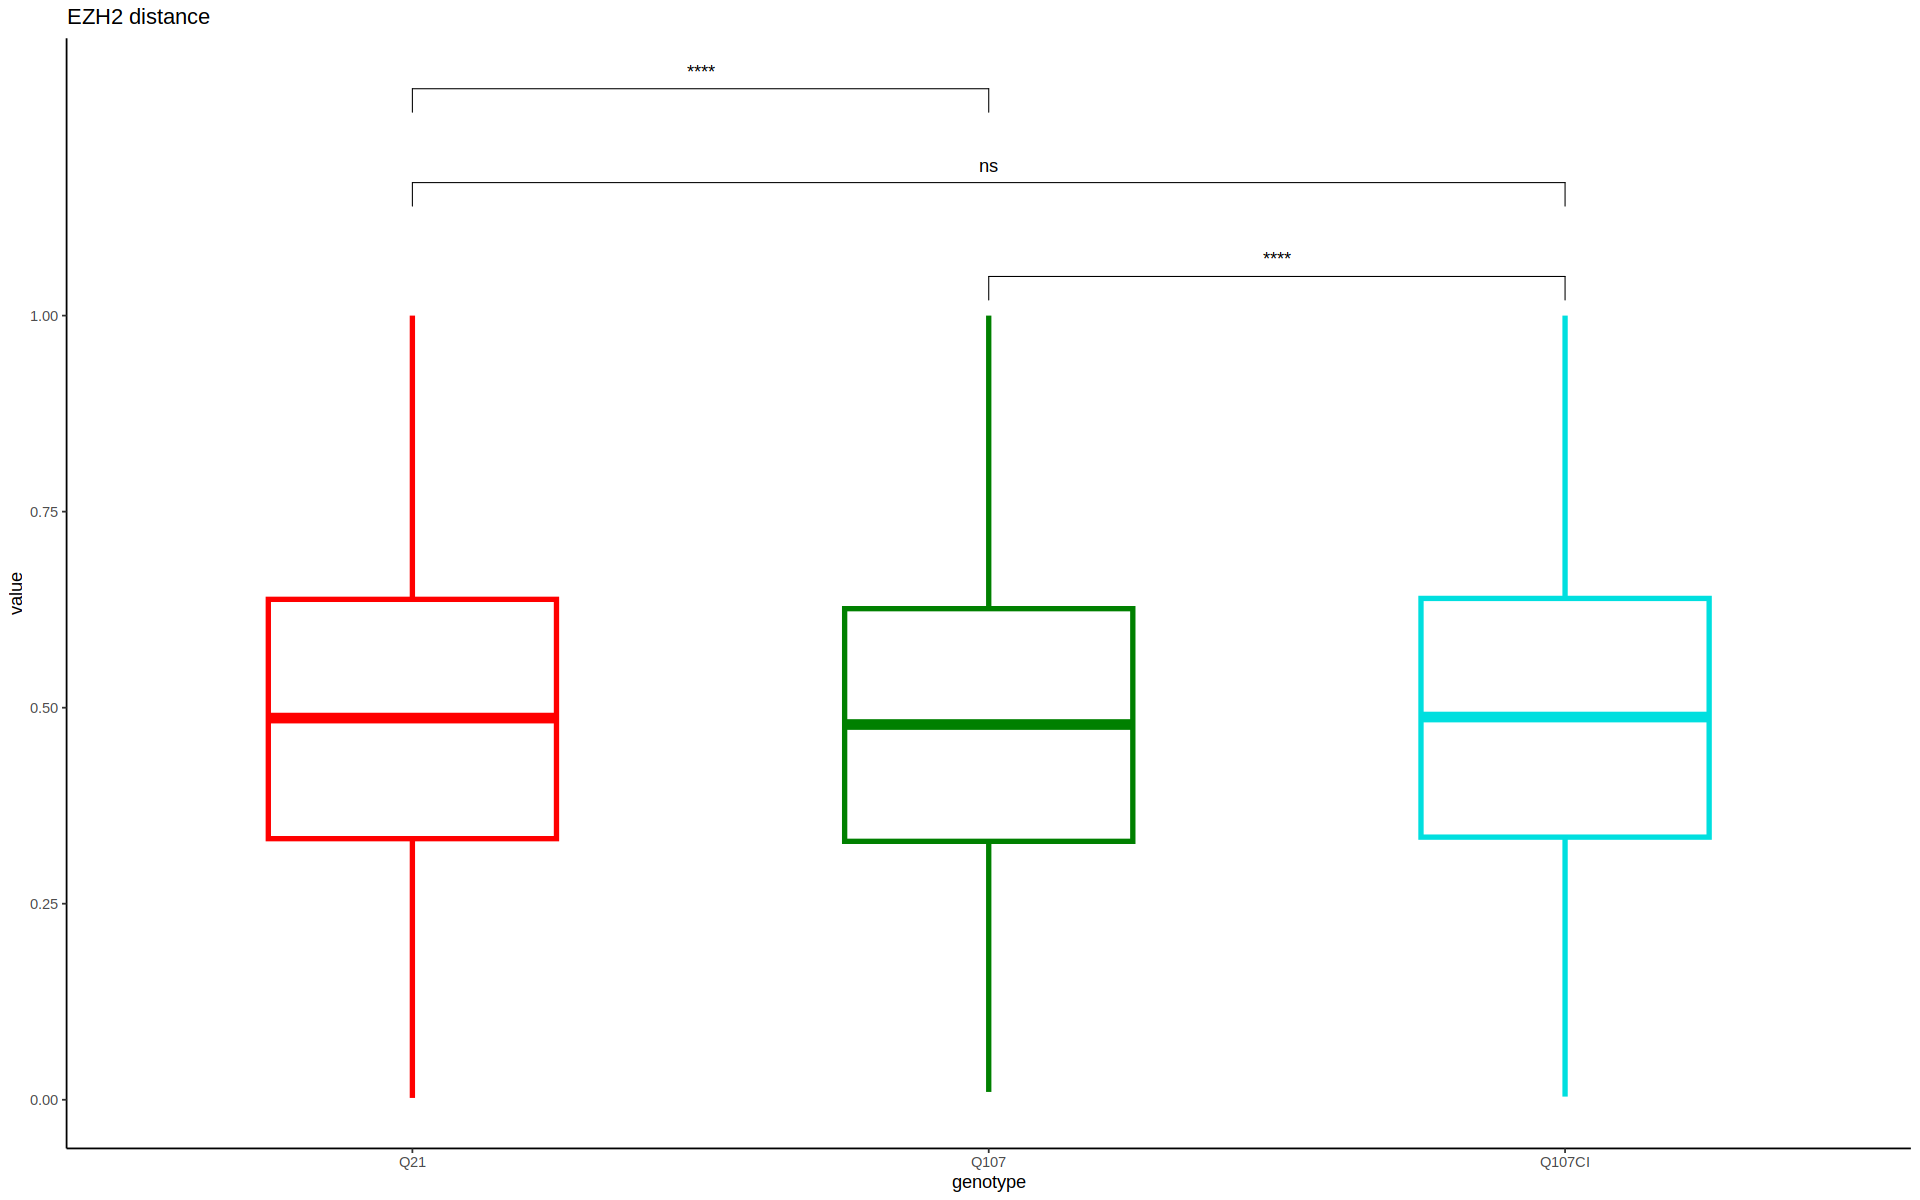

In [115]:
my_pal <- c('#FF0000','#008000','#00DFDF')
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))
df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .5, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    # facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("EZH2 distance") +
                stat_compare_means(
                        method = "t.test", label = "p.signif",
                        comparisons=list(c("Q107","Q107CI"),c("Q107CI",'Q21'),c("Q107",'Q21'))
                    ) +
                scale_y_continuous(breaks = c(0,0.25,0.50,0.75,1))

ggsave('EZH2_boxplot.pdf', width = 4, height = 5, dpi = 300)

In [116]:
df_final %>% group_by(genotype) %>% tally()

genotype,n
<fct>,<int>
Q21,52494
Q107,24864
Q107CI,35025


Picking joint bandwidth of 0.0224

Picking joint bandwidth of 0.0224

Picking joint bandwidth of 0.0224

Picking joint bandwidth of 0.0224



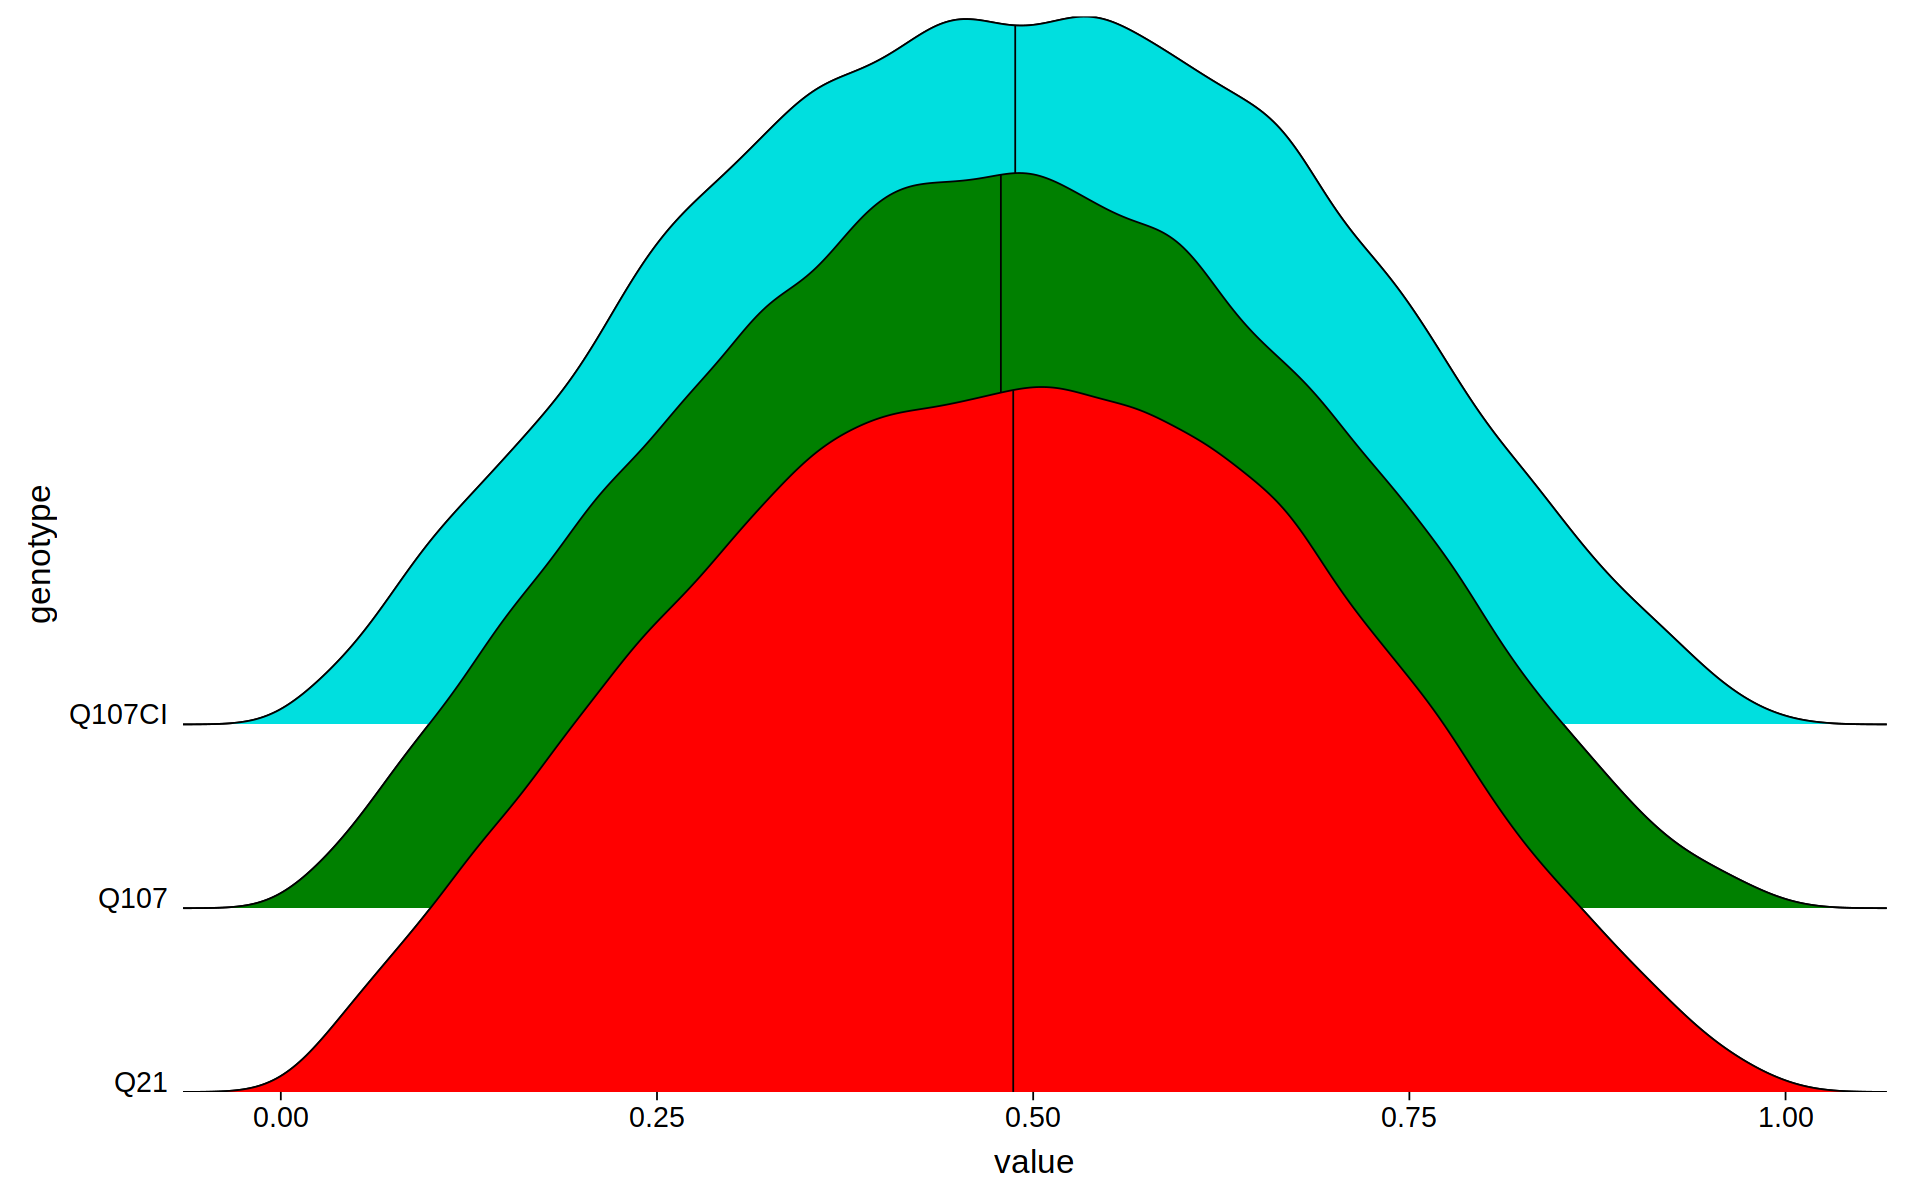

In [141]:
options(repr.plot.width=16, repr.plot.height=10)   # for graphs


my_pal <- c('Q21' = '#FF0000', 'Q107' = '#008000','Q107CI' = '#00DFDF')
prot <- 'EZH2'
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))


ggplot(df_final, aes(x = value, y = genotype, fill = genotype)) +
    geom_density_ridges(scale=4) +
    stat_density_ridges(scale=4, quantile_lines = TRUE, quantiles = 2, ) +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_discrete(expand = c(0, 0)) +
    scale_color_manual(values = my_pal, guide = "none") +
    scale_fill_manual(values = my_pal, guide = "none") +
    # facet_grid(Condition~.) +
    # scale_x_continuous(limits = c(0, 1)) +
    coord_cartesian(clip = "on") +
    theme_ridges(font_size = 20, grid = FALSE, center_axis_labels = TRUE) +
    theme(strip.background = element_rect(color="black", fill="#FFFFFF"),
          strip.text.y=element_text(size=17, face='bold', colour='black')) 


ggsave(paste0(prot,'_instability_distribution.pdf'), width = 20, height = 7, dpi = 300)

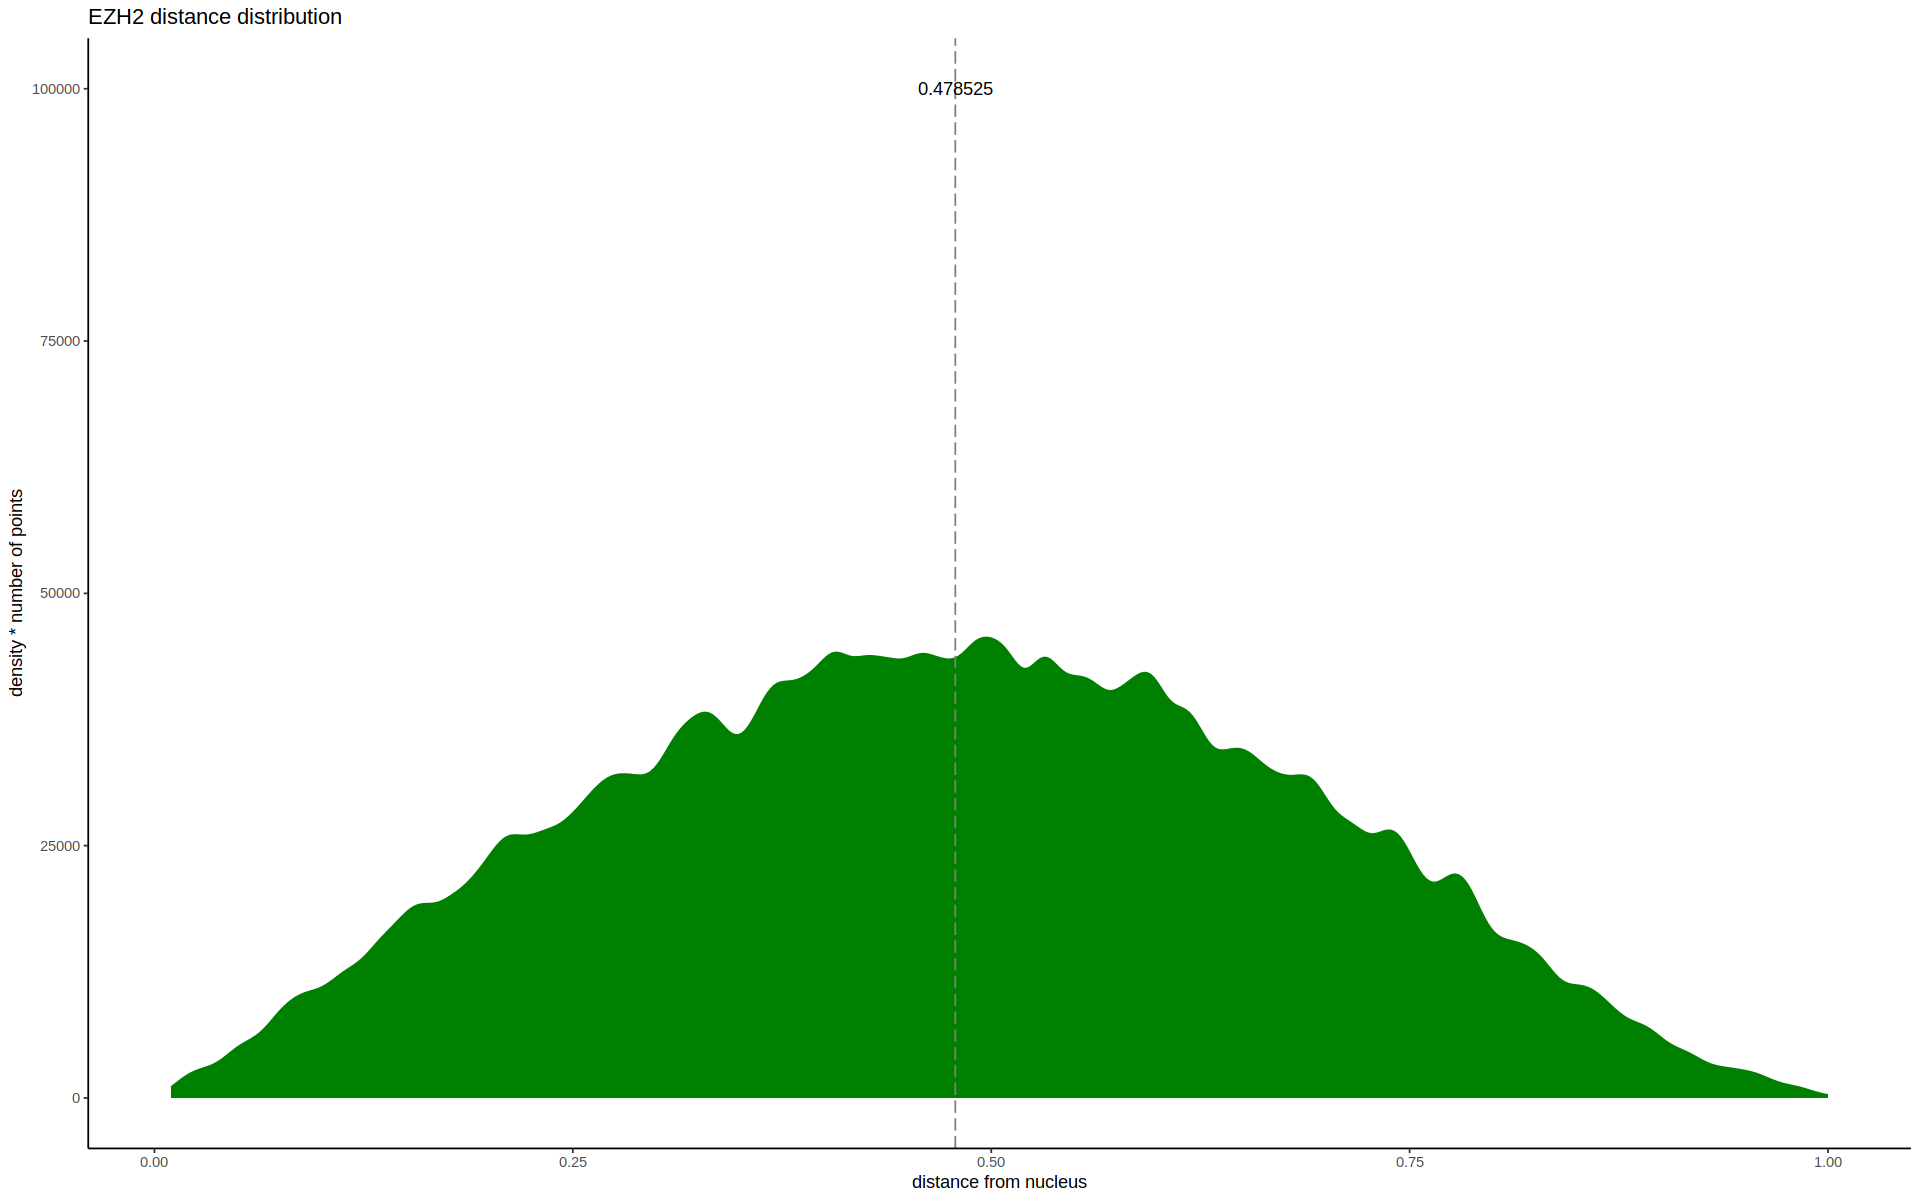

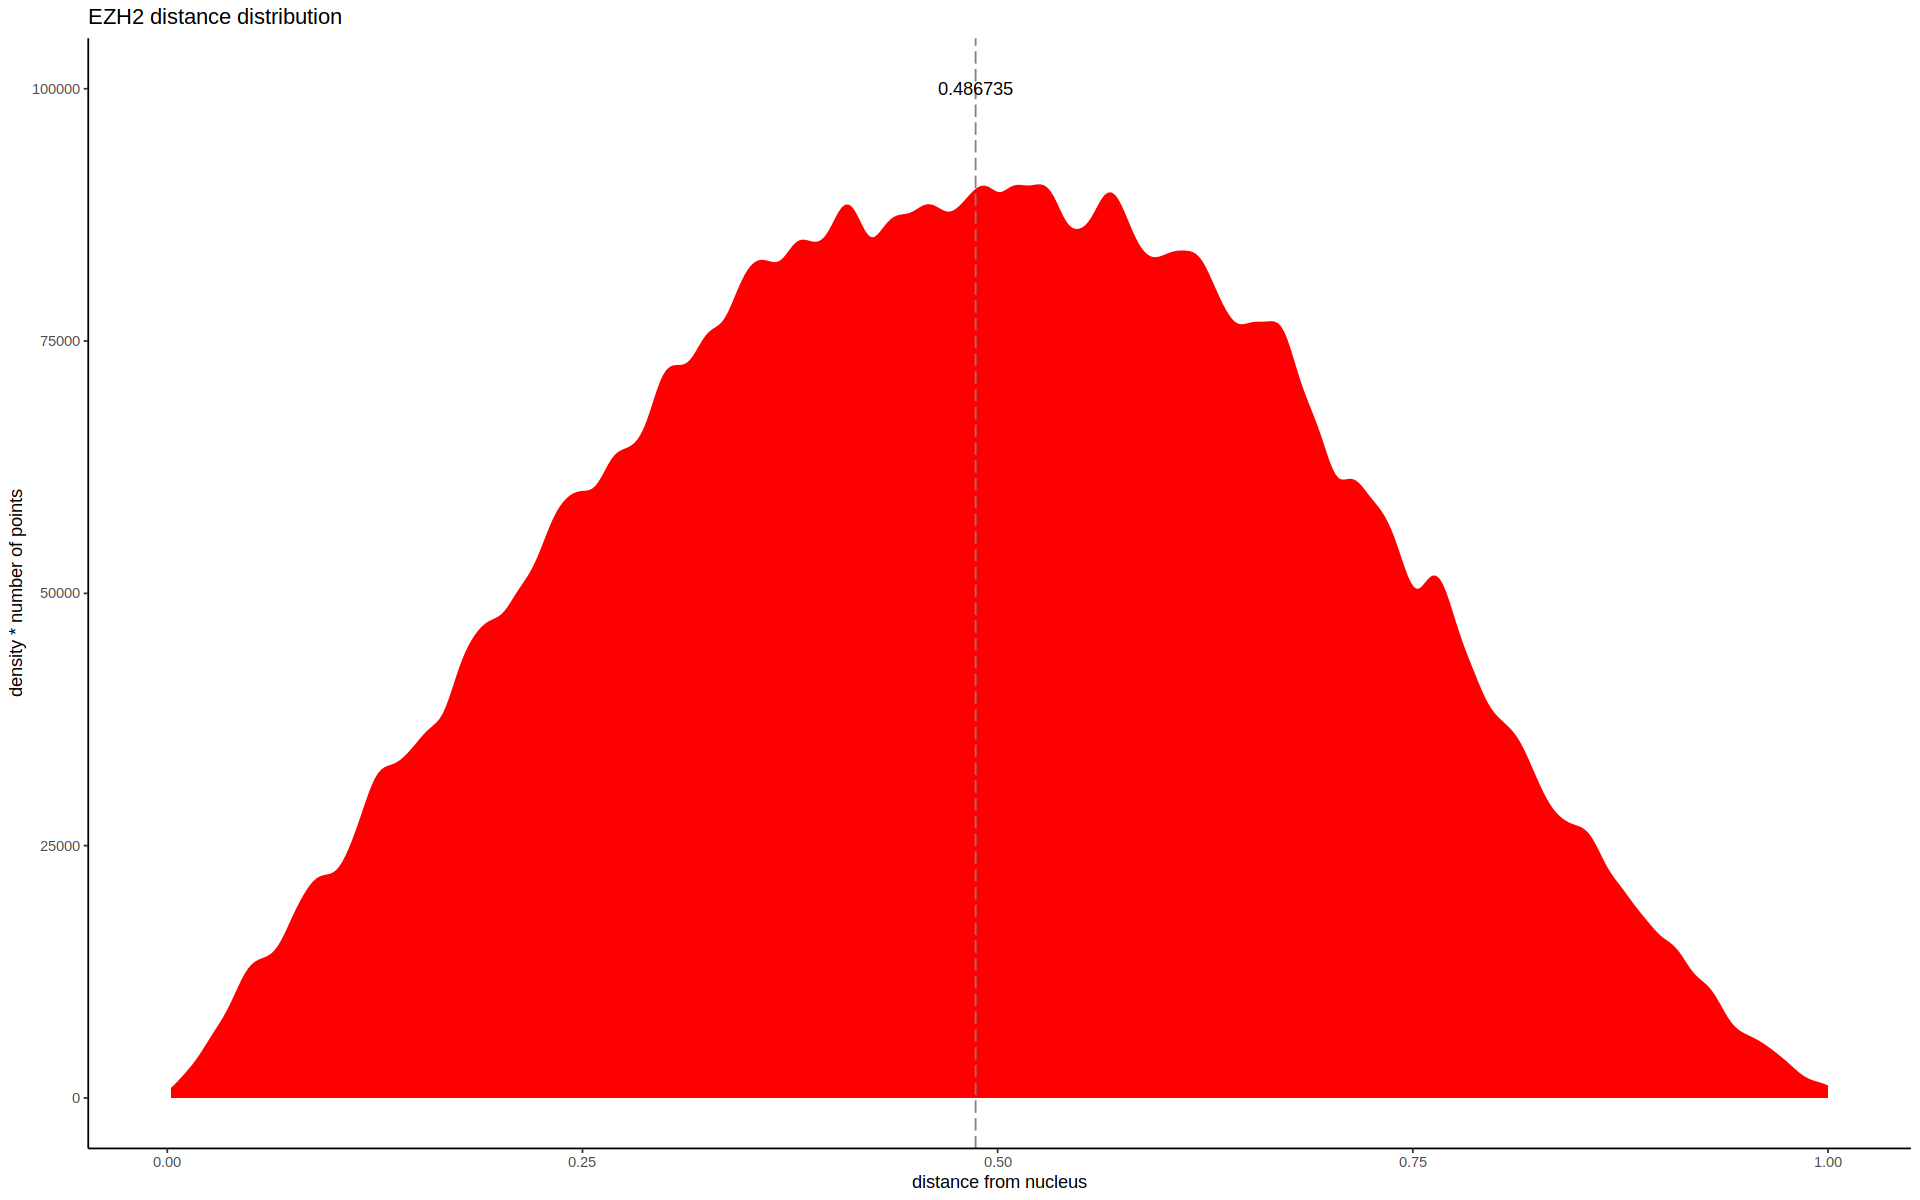

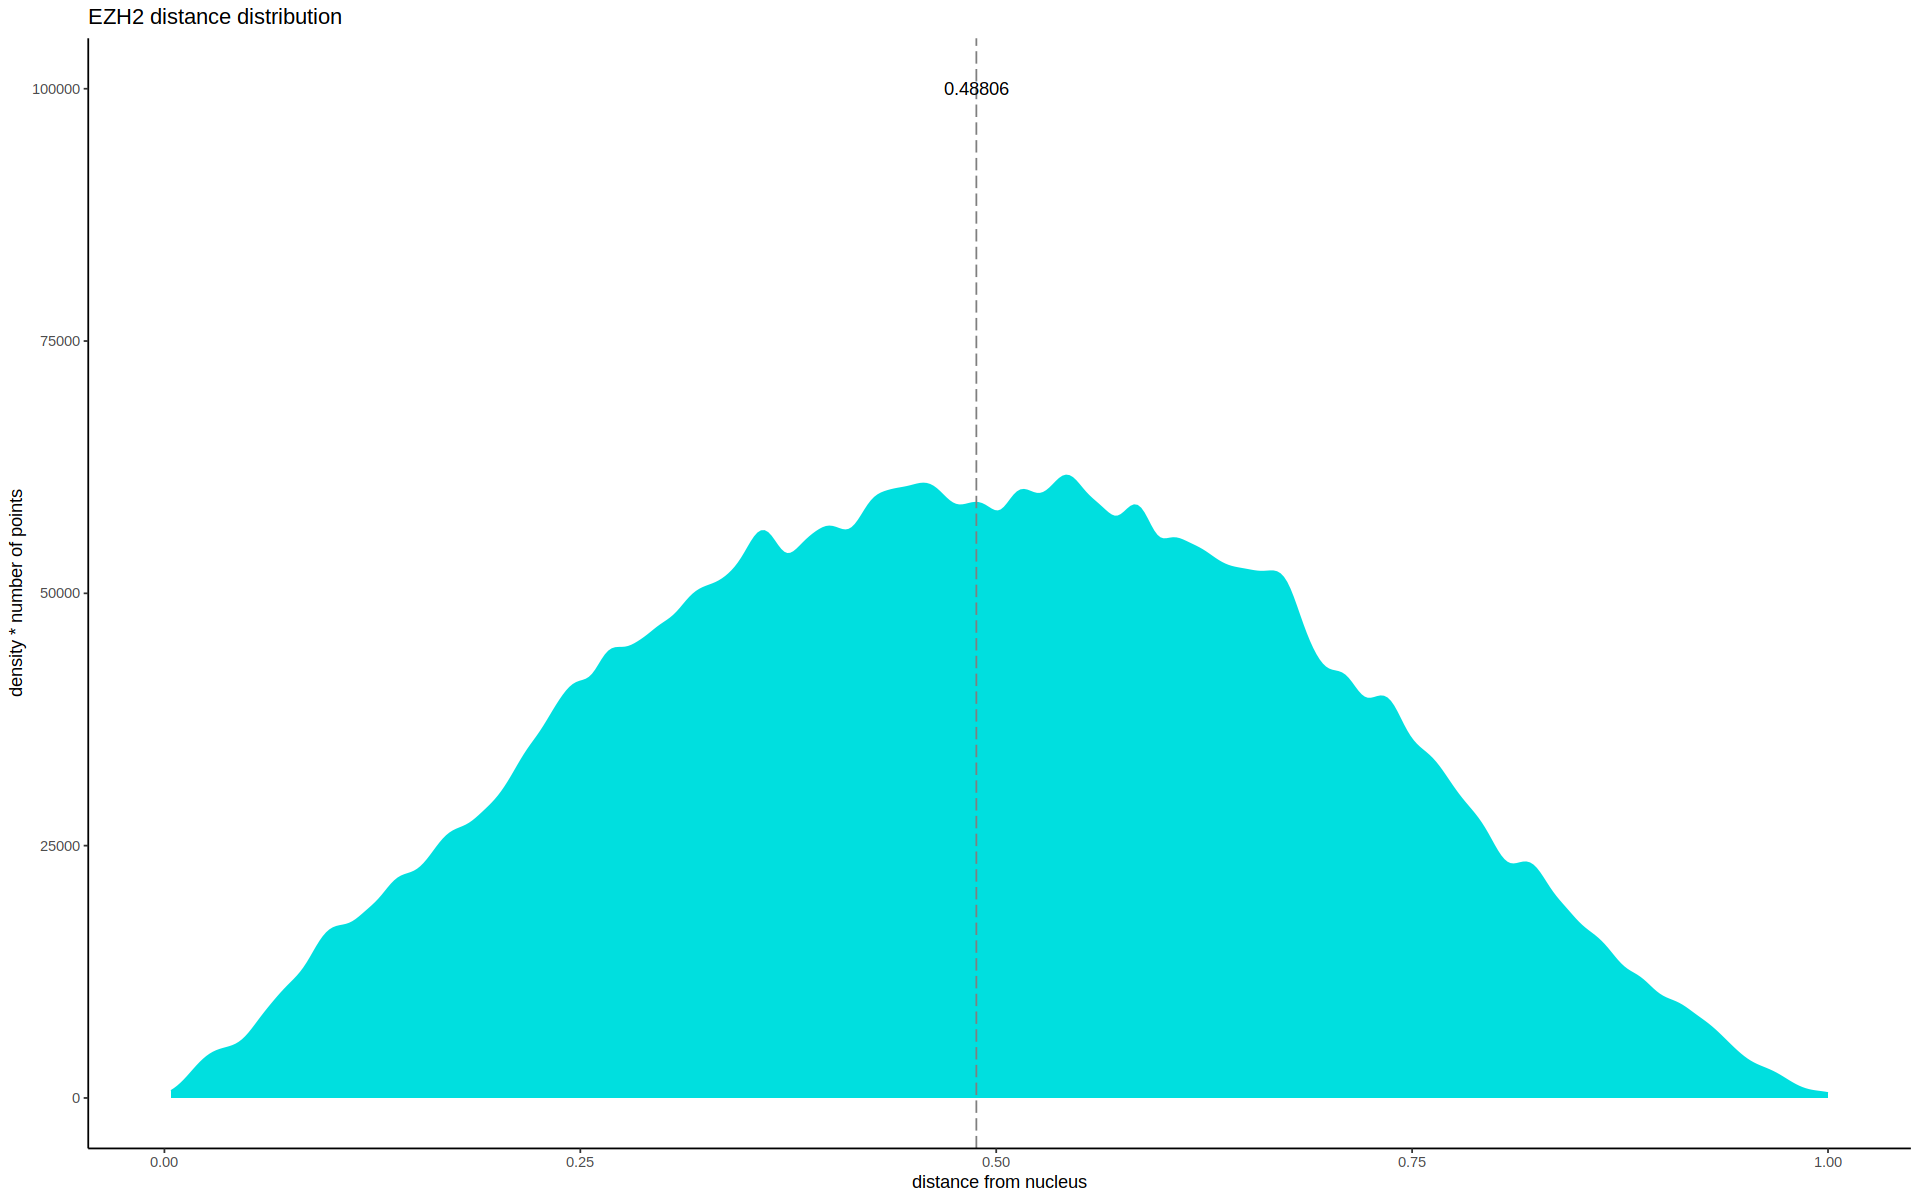

In [84]:
my_pal <- c('Q21' = '#FF0000', 'Q107' = '#008000','Q107CI' = '#00DFDF')
prot <- 'EZH2'

df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

dummy <- df_final %>% filter(genotype == 'Q107') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q107') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash", show.legend =TRUE) +
                annotate(geom="text", x=dummy$median, y=100000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,100000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107_distribution.pdf'), width = 7, height = 4, dpi = 300)


dummy <- df_final %>% filter(genotype == 'Q21') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q21') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash") +
                annotate(geom="text", x=dummy$median, y=100000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,100000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q21_distribution.pdf'), width = 7, height = 4, dpi = 300)


dummy <- df_final %>% filter(genotype == 'Q107CI') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q107CI') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash") +
                annotate(geom="text", x=dummy$median, y=100000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,100000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107CI_distribution.pdf'), width = 7, height = 4, dpi = 300)


## new K9 distance

In [85]:
df <- read.table("20240529_K9_distance.tsv", fill=TRUE, header=TRUE, quote="", sep="\t", encoding="UTF-8")

In [86]:
df %>% str()

'data.frame':	10587 obs. of  10 variables:
 $ Q21_rep1   : chr  "0,88318" "0,53933" "0,57443" "0,42204" ...
 $ Q21_rep2   : chr  "0,83335" "0,66698" "0,54353" "0,70412" ...
 $ Q21_rep3   : chr  "0,8876" "0,50741" "0,53366" "0,62066" ...
 $ Q107_rep1  : chr  "0,69854" "0,74022" "0,79417" "0,39249" ...
 $ Q107_rep2  : chr  "0,86435" "0,78206" "0,60367" "0,7327" ...
 $ Q107_rep3  : chr  "0,89972" "0,94118" "0,68543" "0,5307" ...
 $ Q107CI_rep1: chr  "0,59491" "0,69473" "0,83398" "0,90162" ...
 $ Q107CI_rep2: chr  "0,8486" "0,51808" "0,70396" "0,60981" ...
 $ Q107CI_rep3: chr  "0,53058" "0,51513" "0,54332" "0,48529" ...
 $ Q107CI_rep4: chr  "0,74505" "0,33349" "0,61219" "0,10137" ...


In [87]:
columns2numeric <- colnames(df)

In [88]:
for (i in columns2numeric){
  df[[i]] <- as.numeric(sub(",", ".", df[[i]], fixed = TRUE))

}

In [89]:
df_longer <- df %>%
  pivot_longer(cols = everything(), 
               names_to = c(".value", "Condition"), 
               names_sep = "_")

In [90]:
df_longer

Condition,Q21,Q107,Q107CI
<chr>,<dbl>,<dbl>,<dbl>
rep1,0.88318,0.69854,0.59491
rep2,0.83335,0.86435,0.84860
rep3,0.88760,0.89972,0.53058
rep4,NA,NA,0.74505
rep1,0.53933,0.74022,0.69473
rep2,0.66698,0.78206,0.51808
rep3,0.50741,0.94118,0.51513
rep4,NA,NA,0.33349
rep1,0.57443,0.79417,0.83398


In [91]:
df_temp <- df_longer %>% pivot_longer(c('Q21','Q107','Q107CI'), names_to = 'genotype')
head(df_temp)

Condition,genotype,value
<chr>,<chr>,<dbl>
rep1,Q21,0.88318
rep1,Q107,0.69854
rep1,Q107CI,0.59491
rep2,Q21,0.83335
rep2,Q107,0.86435
rep2,Q107CI,0.84860


In [92]:
df_temp$bin <- ifelse(df_temp$value <= 0.3 , 'zone1',
                      ifelse(df_temp$value > 0.3 & df_temp$value <= 0.6 , 'zone2', 'zone3'))    


In [93]:
sum(is.na(df_temp))

[1] 157628

In [94]:
df_final <- df_temp %>% drop_na()

In [95]:
df_final %>% head

Condition,genotype,value,bin
<chr>,<chr>,<dbl>,<chr>
rep1,Q21,0.88318,zone3
rep1,Q107,0.69854,zone3
rep1,Q107CI,0.59491,zone2
rep2,Q21,0.83335,zone3
rep2,Q107,0.86435,zone3
rep2,Q107CI,0.84860,zone3


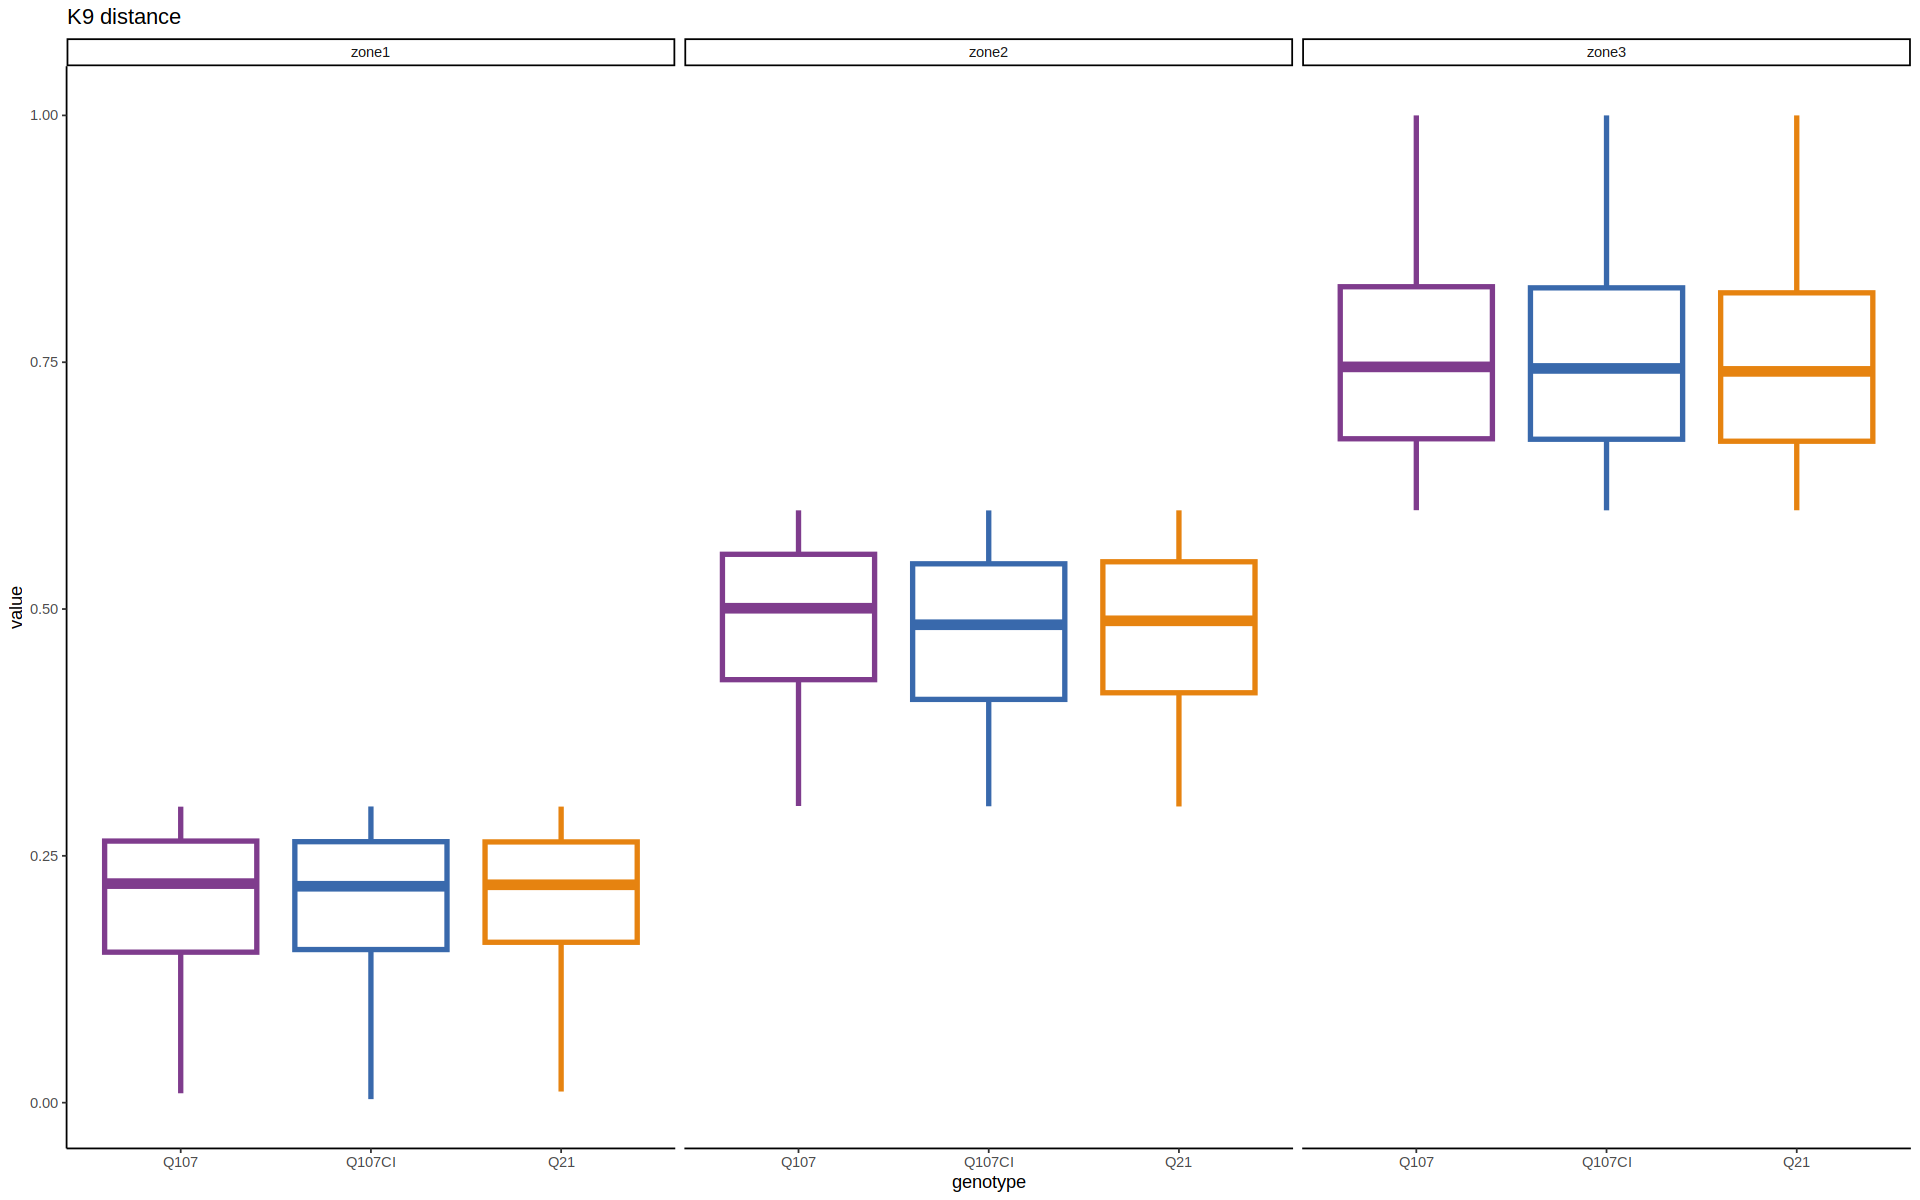

In [96]:
my_pal <- rcartocolor::carto_pal(n = 8, name = "Bold")[c(1, 3, 7, 2)]

df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .8, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("K9 distance")

[1] FALSE


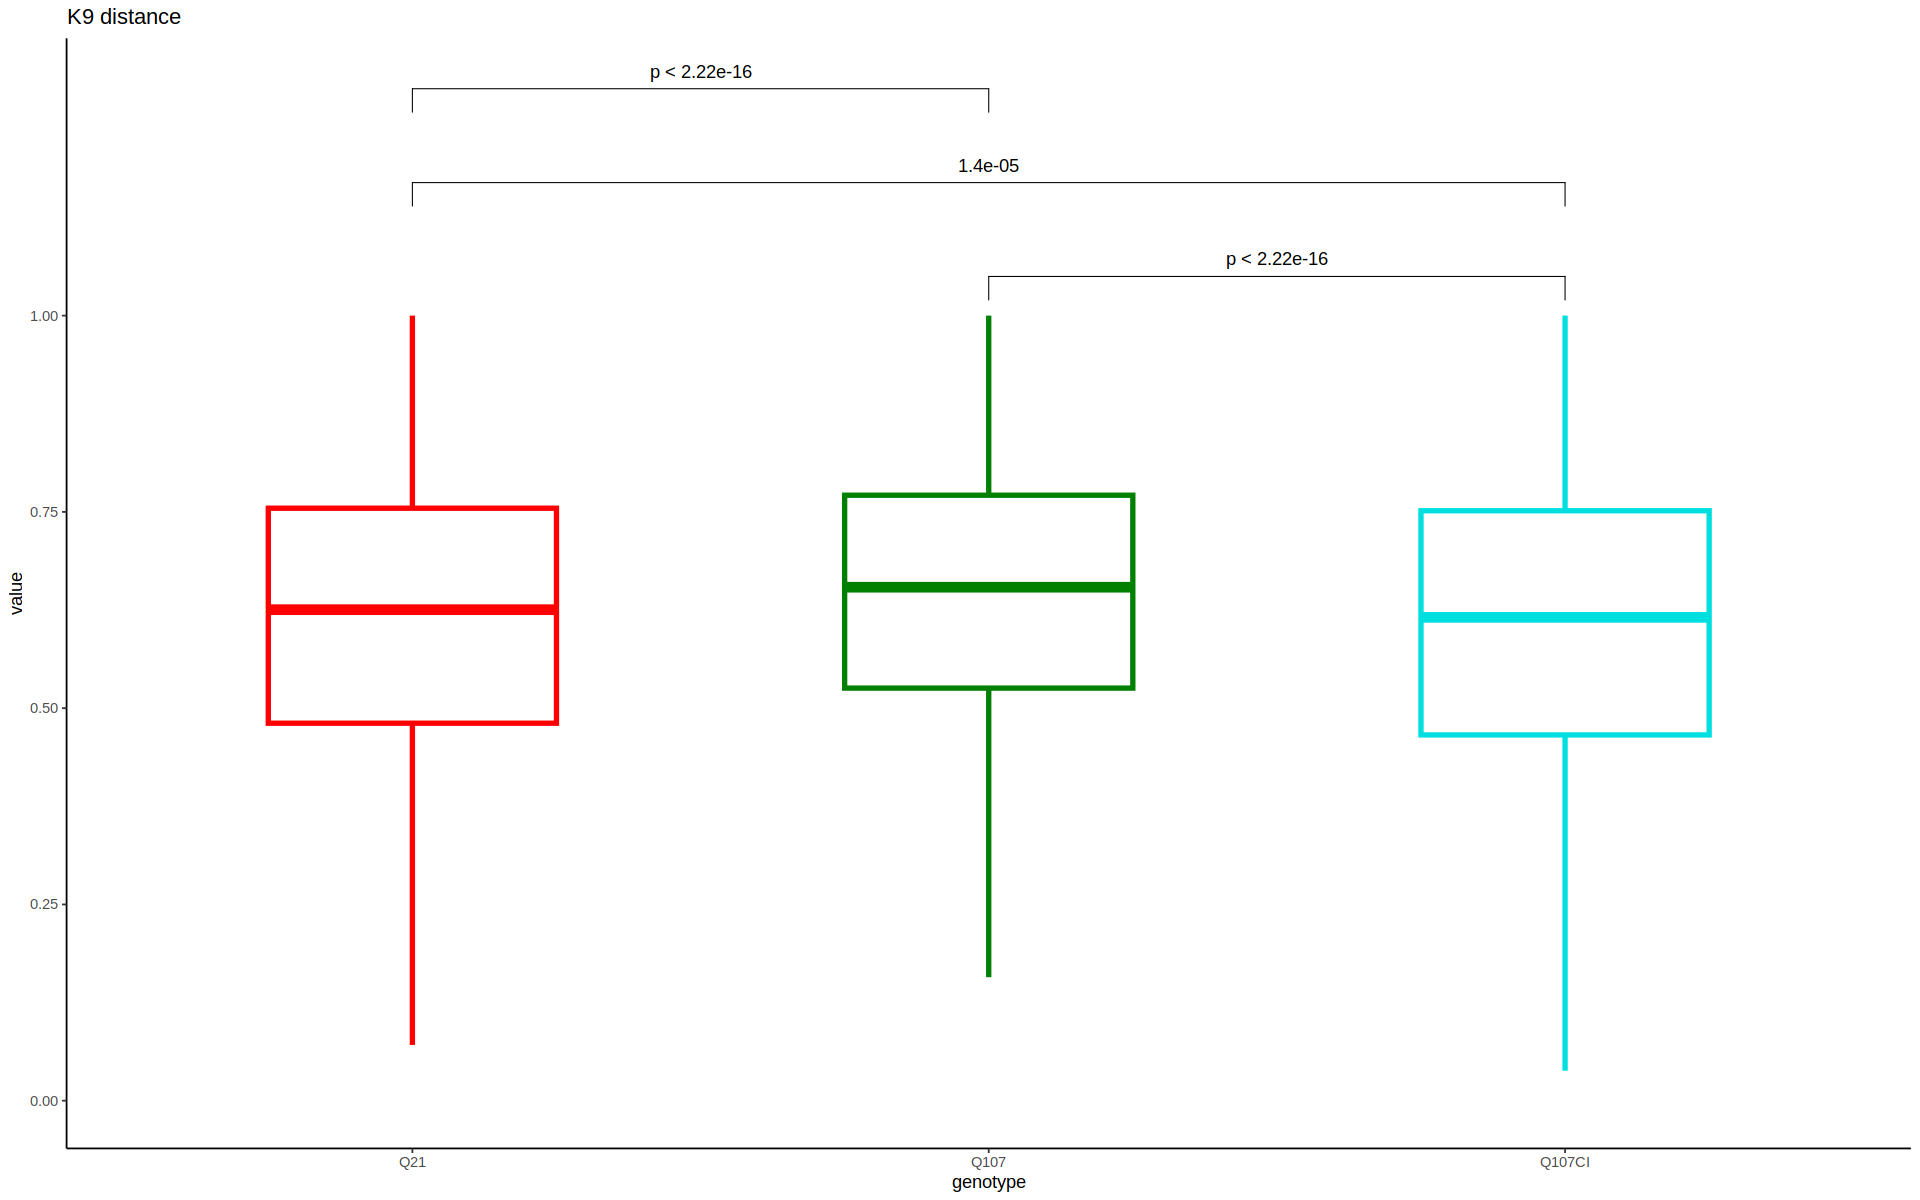

In [97]:
my_pal <- c('#FF0000','#008000','#00DFDF')
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .5, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    # facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("K9 distance") +
                    stat_compare_means(
                        method = "t.test", label = "p.format",
                        comparisons=list(c("Q107","Q107CI"),c("Q107CI",'Q21'),c("Q107",'Q21'))
                    ) +
                scale_y_continuous(breaks = c(0,0.25,0.50,0.75,1))

ggsave('K9_boxplot.pdf', width = 4, height = 5, dpi = 300)

In [98]:
summary(df_final$value)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003494 0.482550 0.627640 0.610359 0.757000 1.000000 

Picking joint bandwidth of 0.025

Picking joint bandwidth of 0.025

Picking joint bandwidth of 0.025

Picking joint bandwidth of 0.025



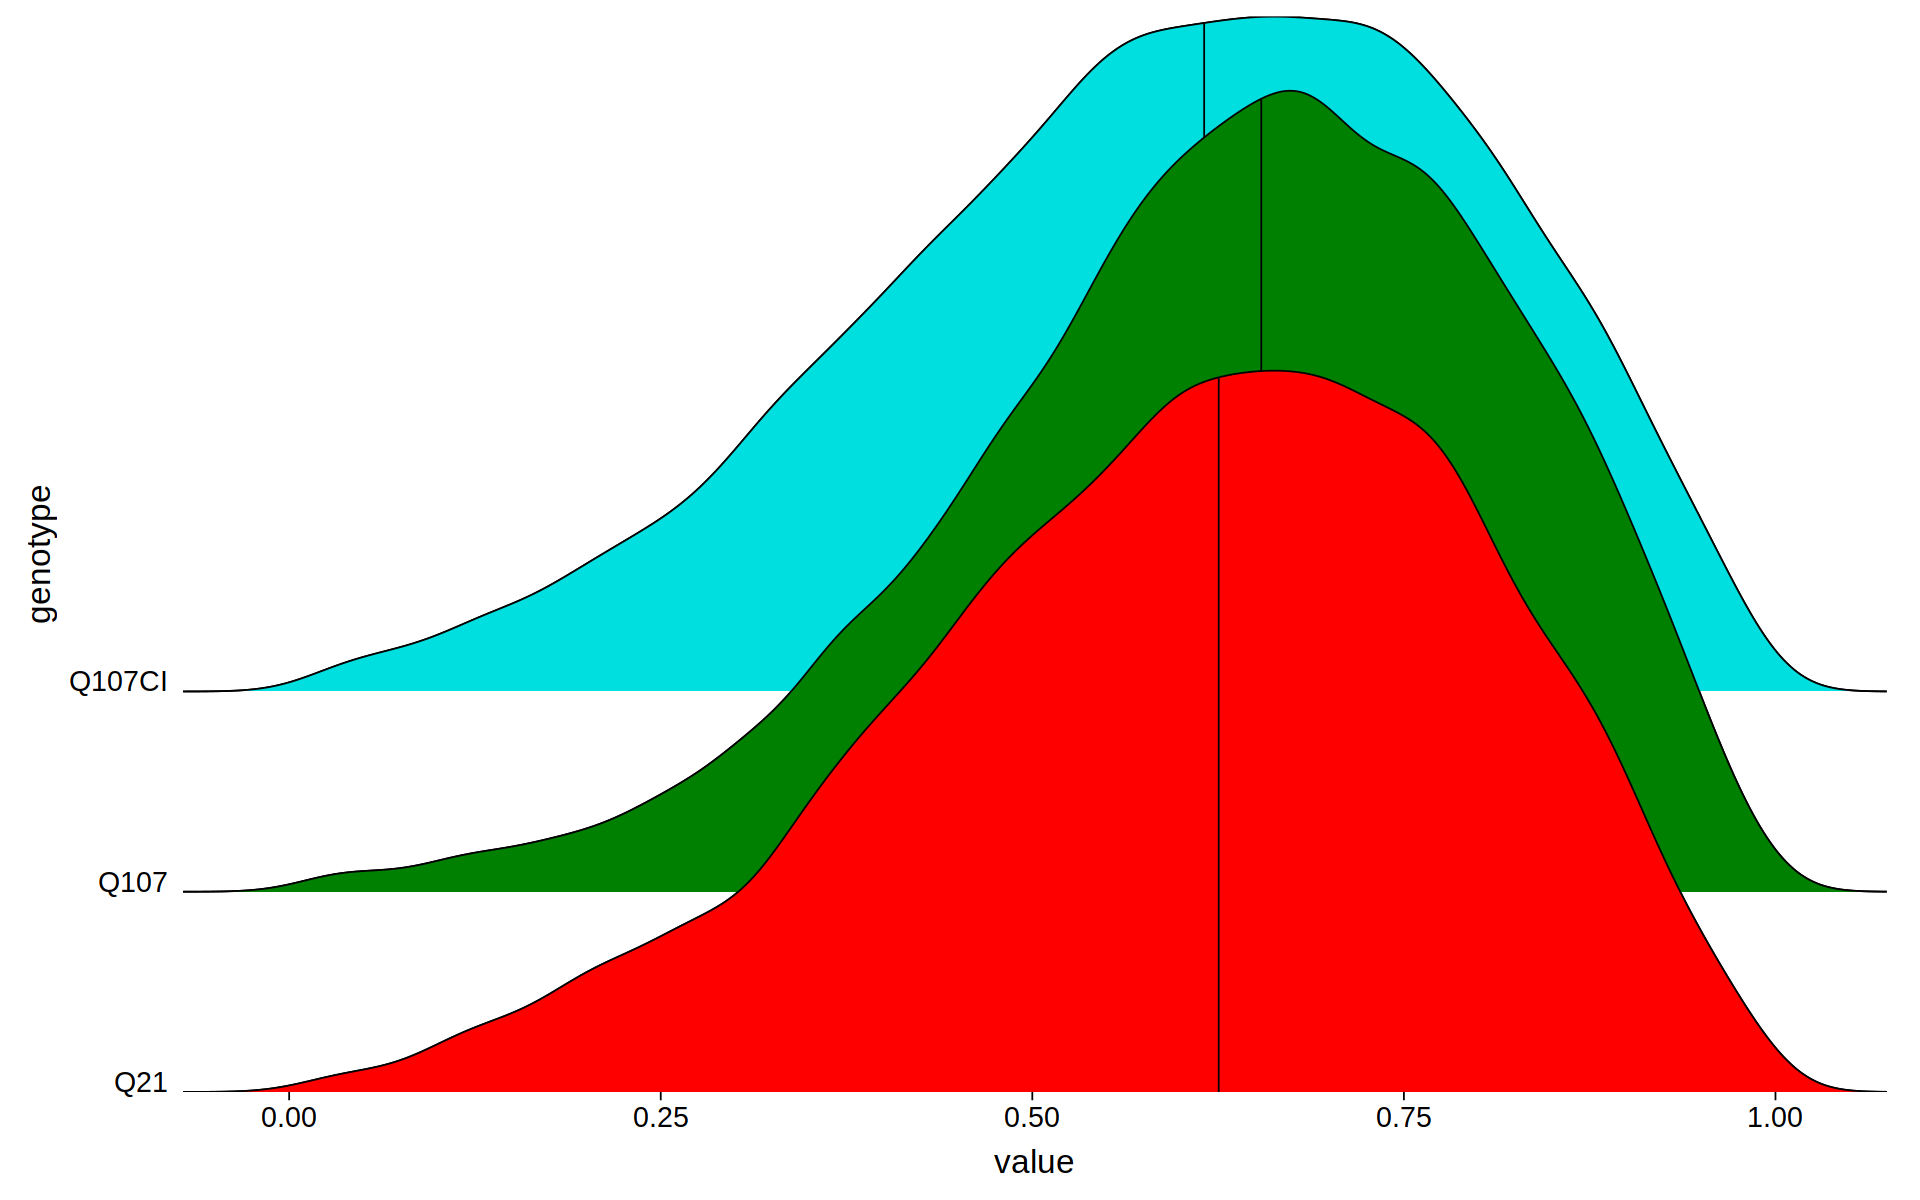

In [99]:
options(repr.plot.width=16, repr.plot.height=10)   # for graphs


my_pal <- c('Q21' = '#FF0000', 'Q107' = '#008000','Q107CI' = '#00DFDF')
prot <- 'K9'
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))


ggplot(df_final, aes(x = value, y = genotype, fill = genotype)) +
    geom_density_ridges(scale=4) +
    stat_density_ridges(scale=4, quantile_lines = TRUE, quantiles = 2, ) +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_discrete(expand = c(0, 0)) +
    scale_color_manual(values = my_pal, guide = "none") +
    scale_fill_manual(values = my_pal, guide = "none") +
    # facet_grid(Condition~.) +
    # scale_x_continuous(limits = c(0, 1)) +
    coord_cartesian(clip = "on") +
    theme_ridges(font_size = 20, grid = FALSE, center_axis_labels = TRUE) +
    theme(strip.background = element_rect(color="black", fill="#FFFFFF"),
          strip.text.y=element_text(size=17, face='bold', colour='black')) 


ggsave(paste0(prot,'_instability_distribution.pdf'), width = 20, height = 7, dpi = 300)

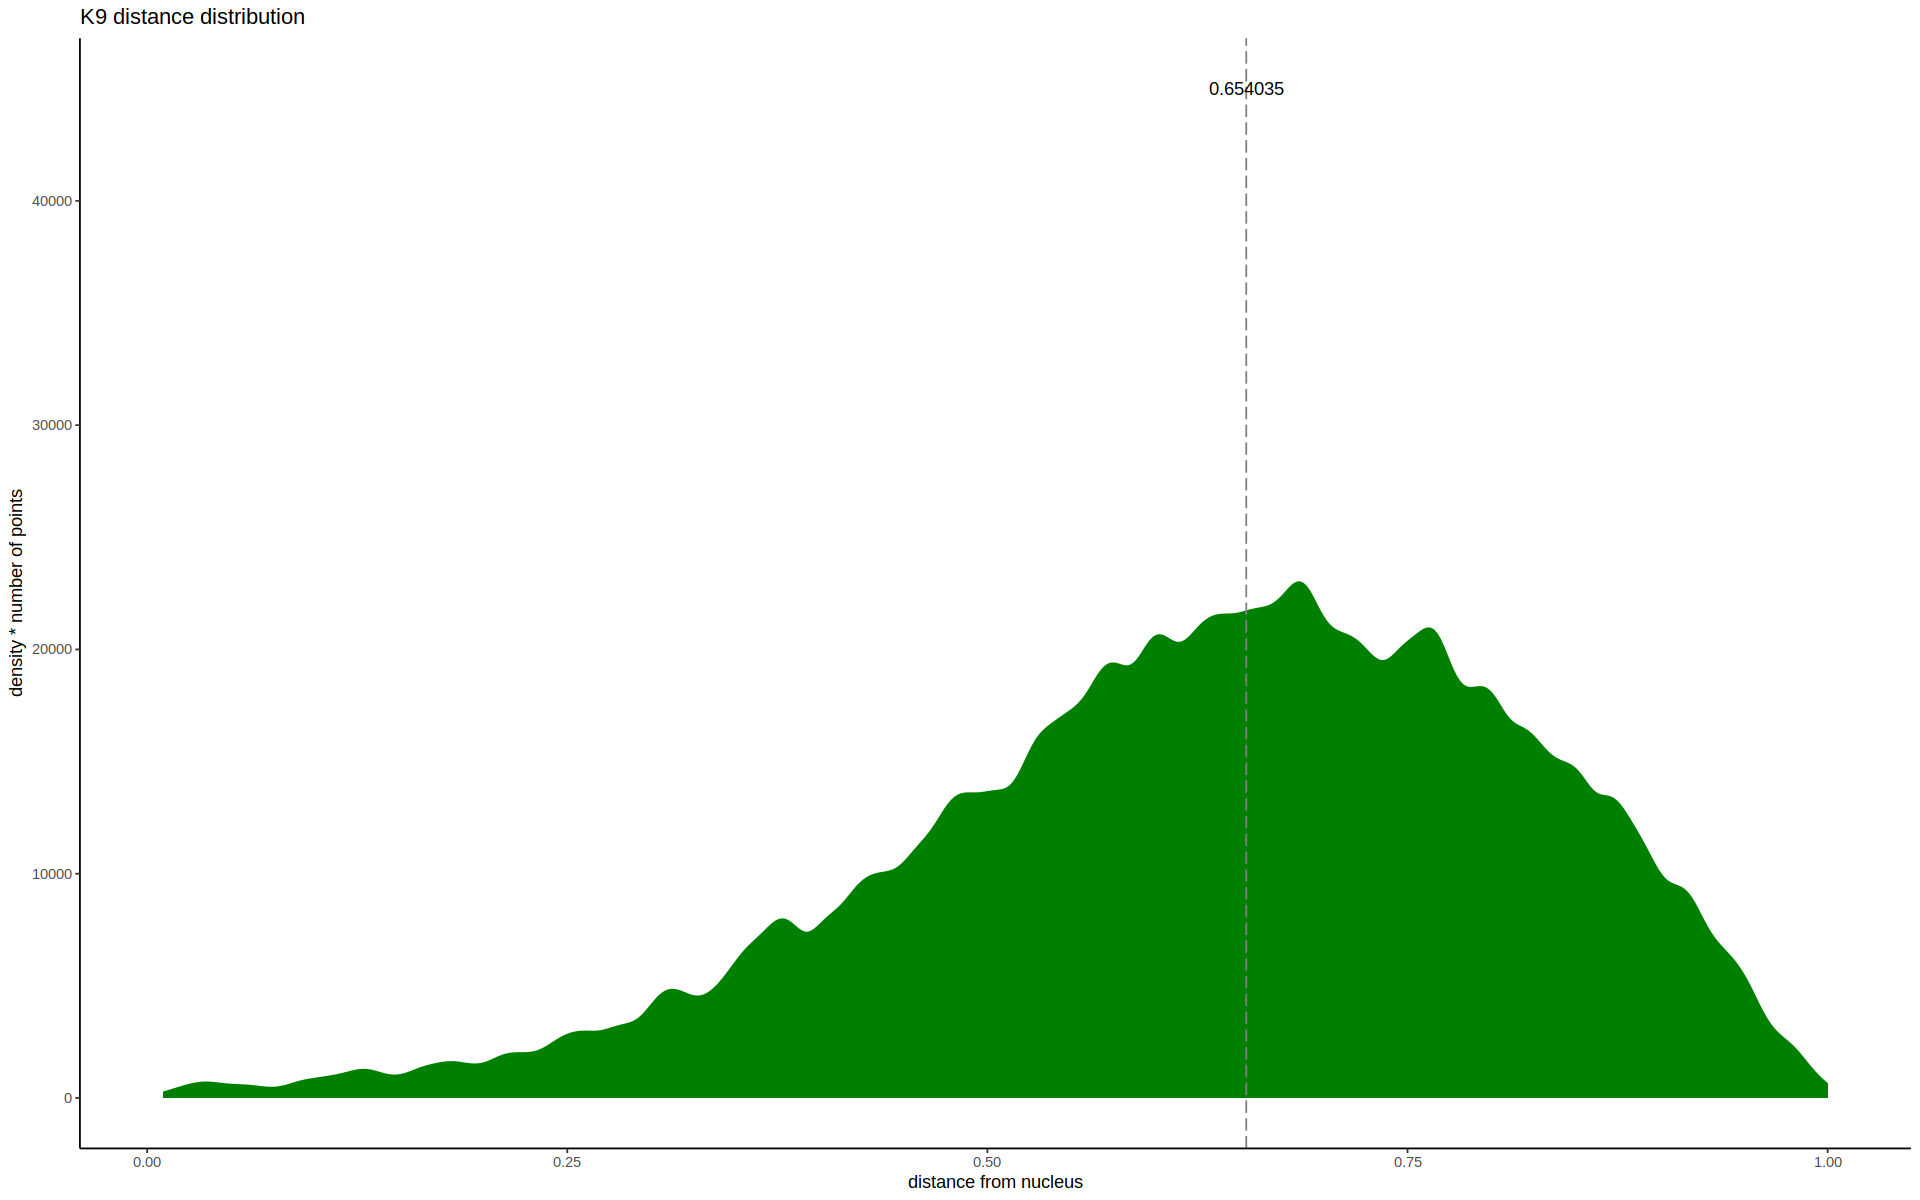

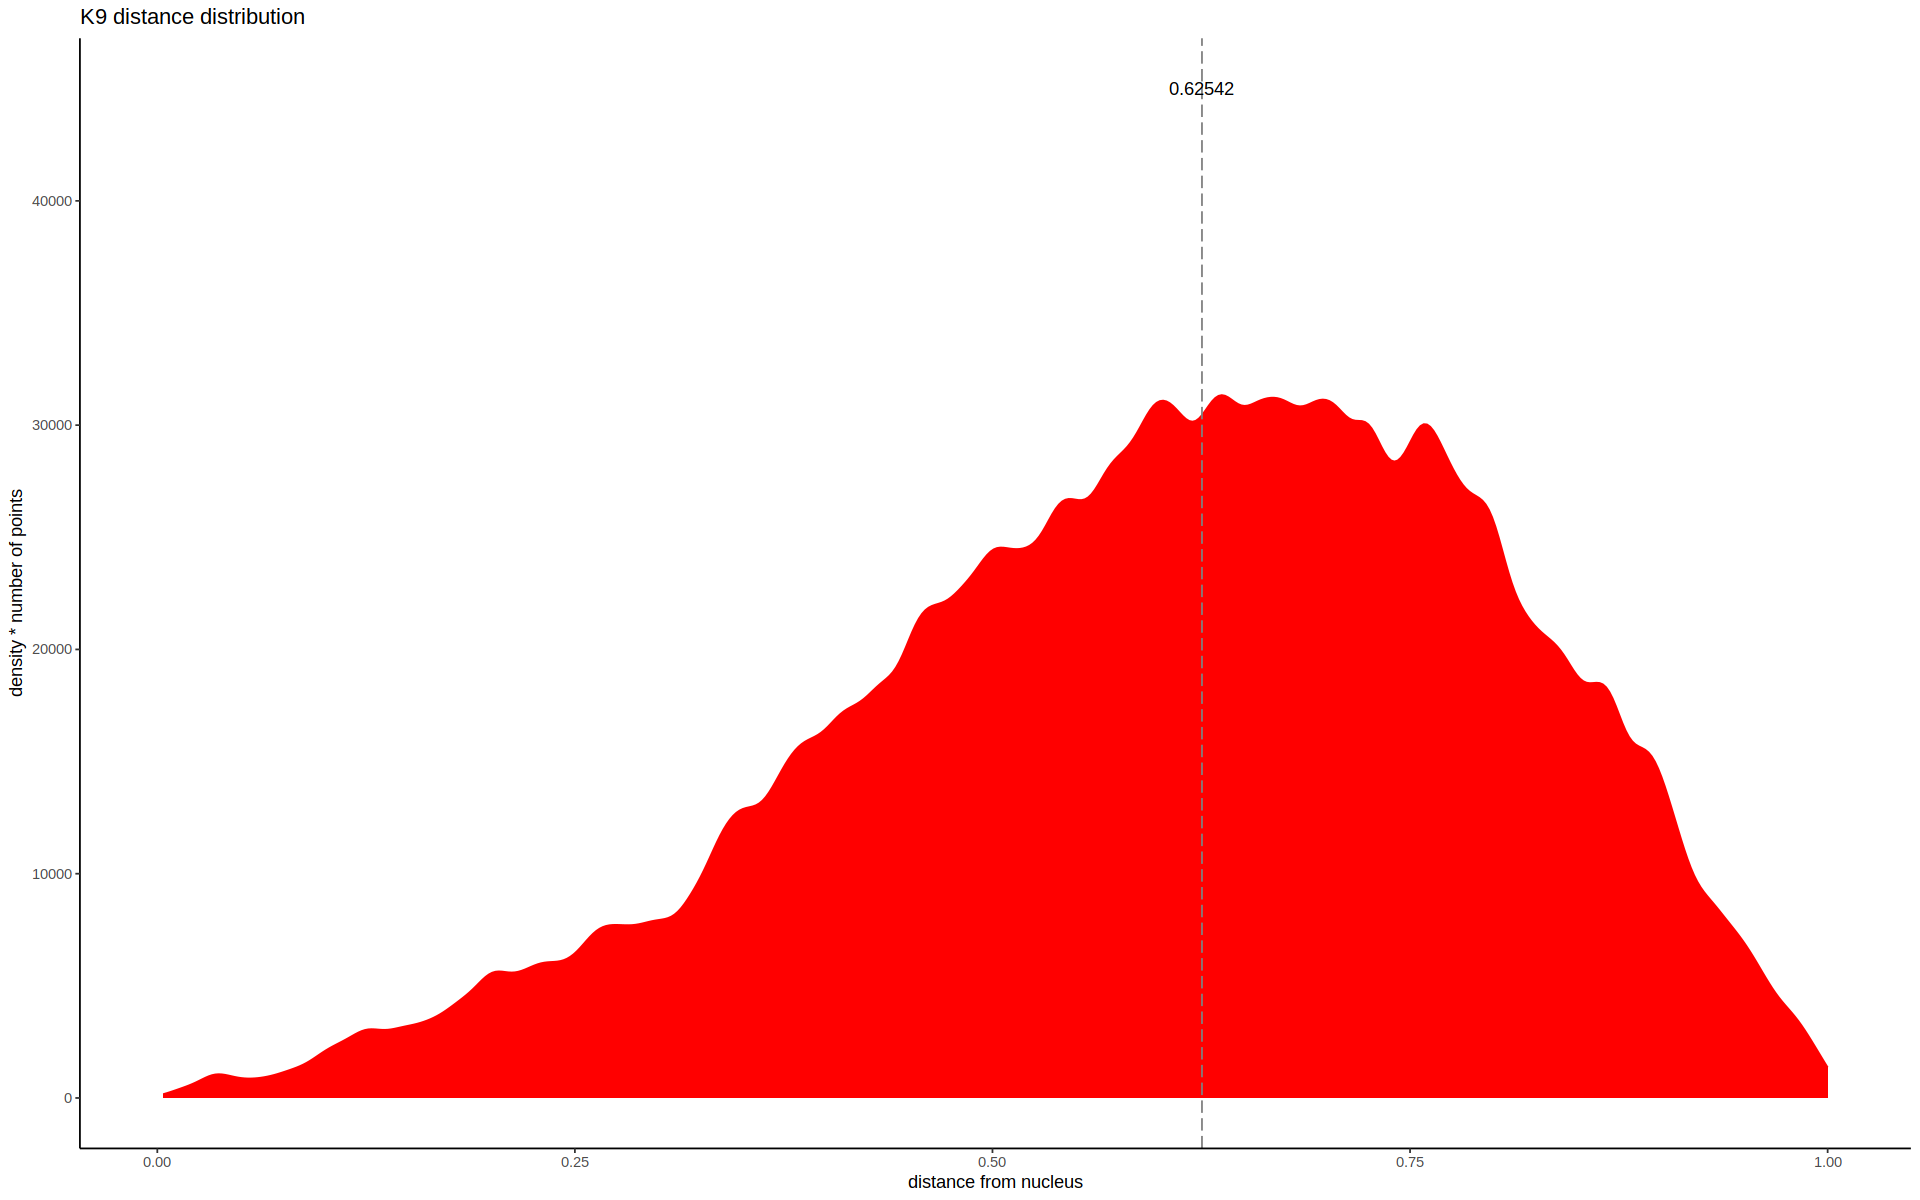

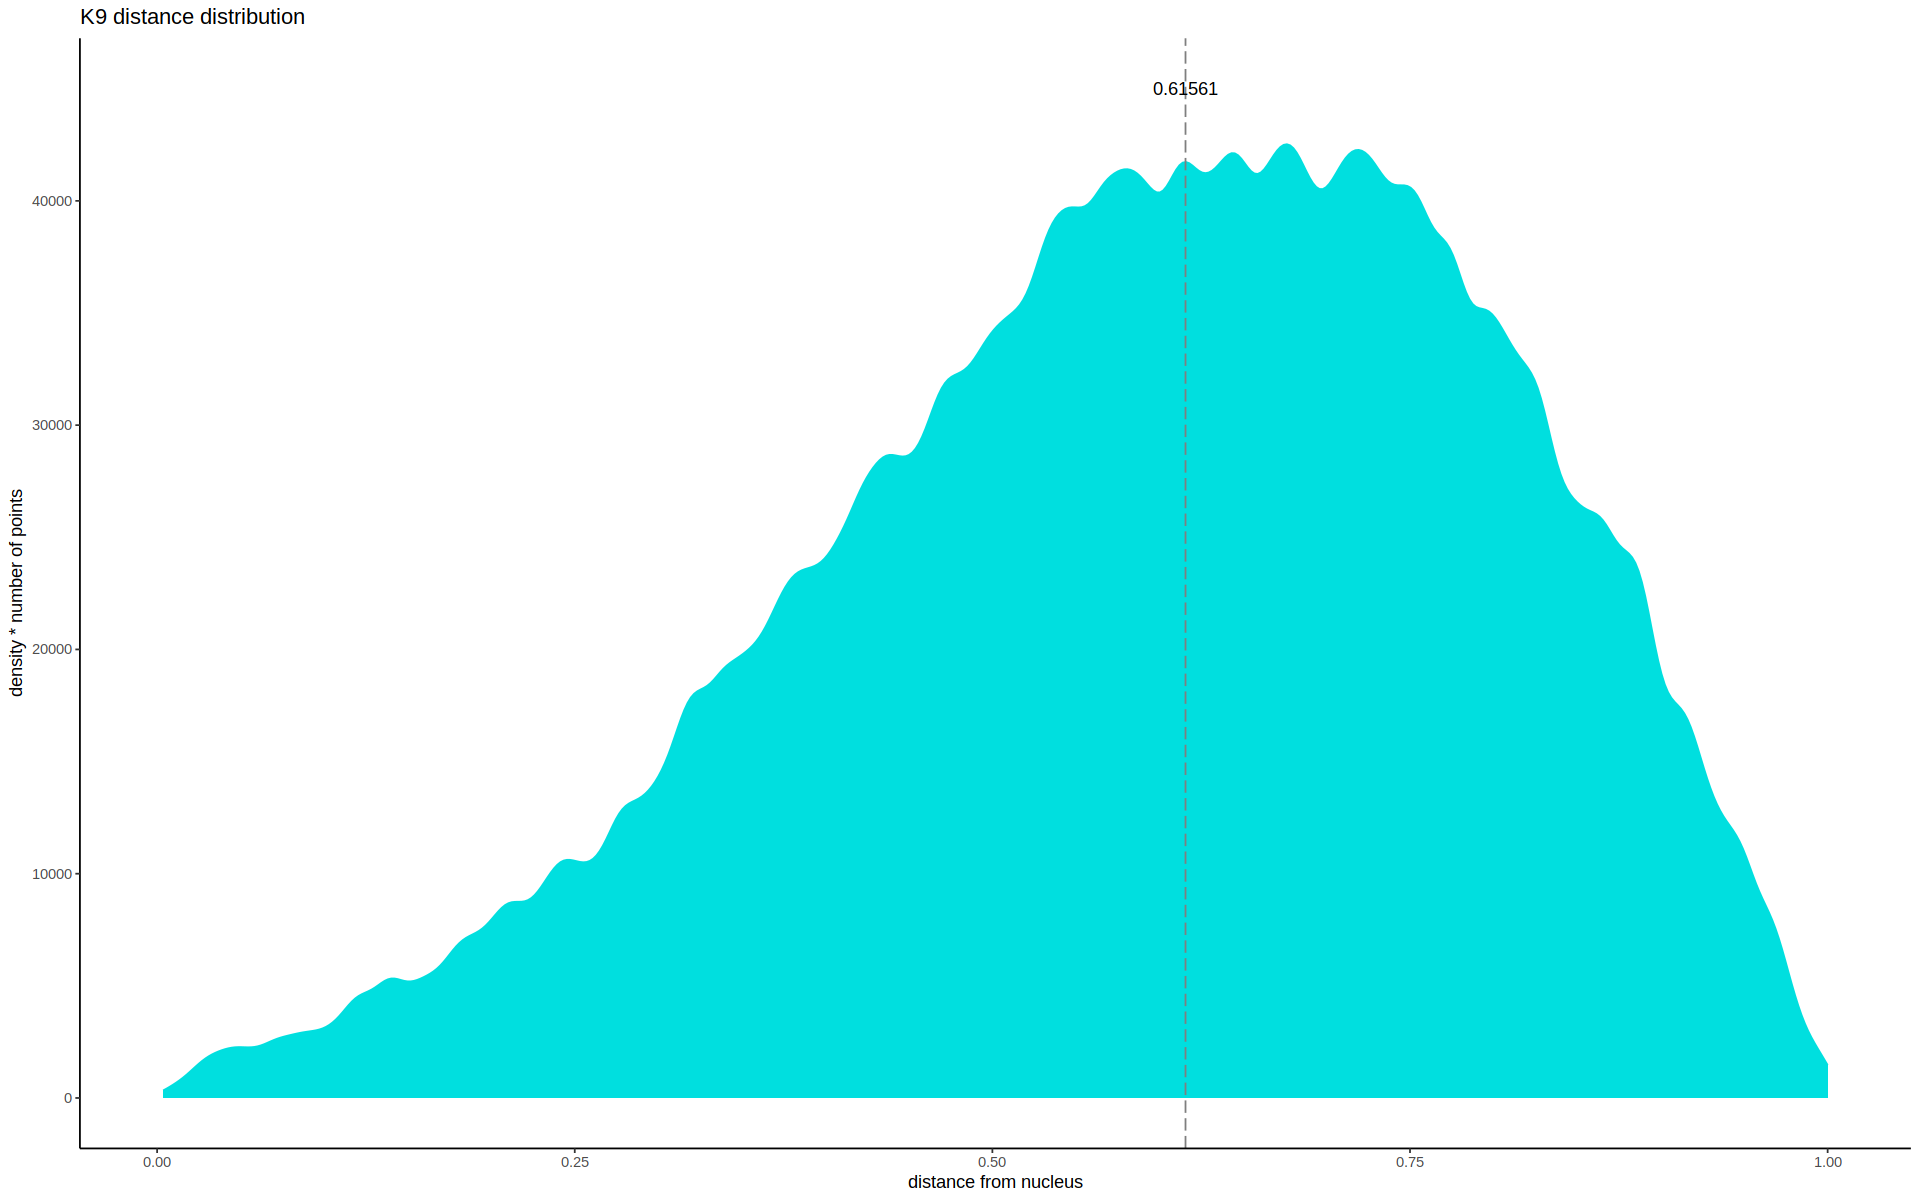

In [100]:
my_pal <- c('Q21' = '#FF0000', 'Q107' = '#008000','Q107CI' = '#00DFDF')
prot <- 'K9'

df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

dummy <- df_final %>% filter(genotype == 'Q107') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q107') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash", show.legend =TRUE) +
                annotate(geom="text", x=dummy$median, y=45000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,45000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107_distribution.pdf'), width = 7, height = 4, dpi = 300)


dummy <- df_final %>% filter(genotype == 'Q21') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q21') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash") +
                annotate(geom="text", x=dummy$median, y=45000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,45000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q21_distribution.pdf'), width = 7, height = 4, dpi = 300)


dummy <- df_final %>% filter(genotype == 'Q107CI') %>%
  group_by(genotype) %>%
  summarize(median = median(value))


df_final %>% filter(genotype == 'Q107CI') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density( adjust = .33  ) +
                geom_vline(data = dummy, aes(xintercept = median, color = '#0C0C0C'), linetype="longdash") +
                annotate(geom="text", x=dummy$median, y=45000, label=dummy$median,color="black") +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,45000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107CI_distribution.pdf'), width = 7, height = 4, dpi = 300)

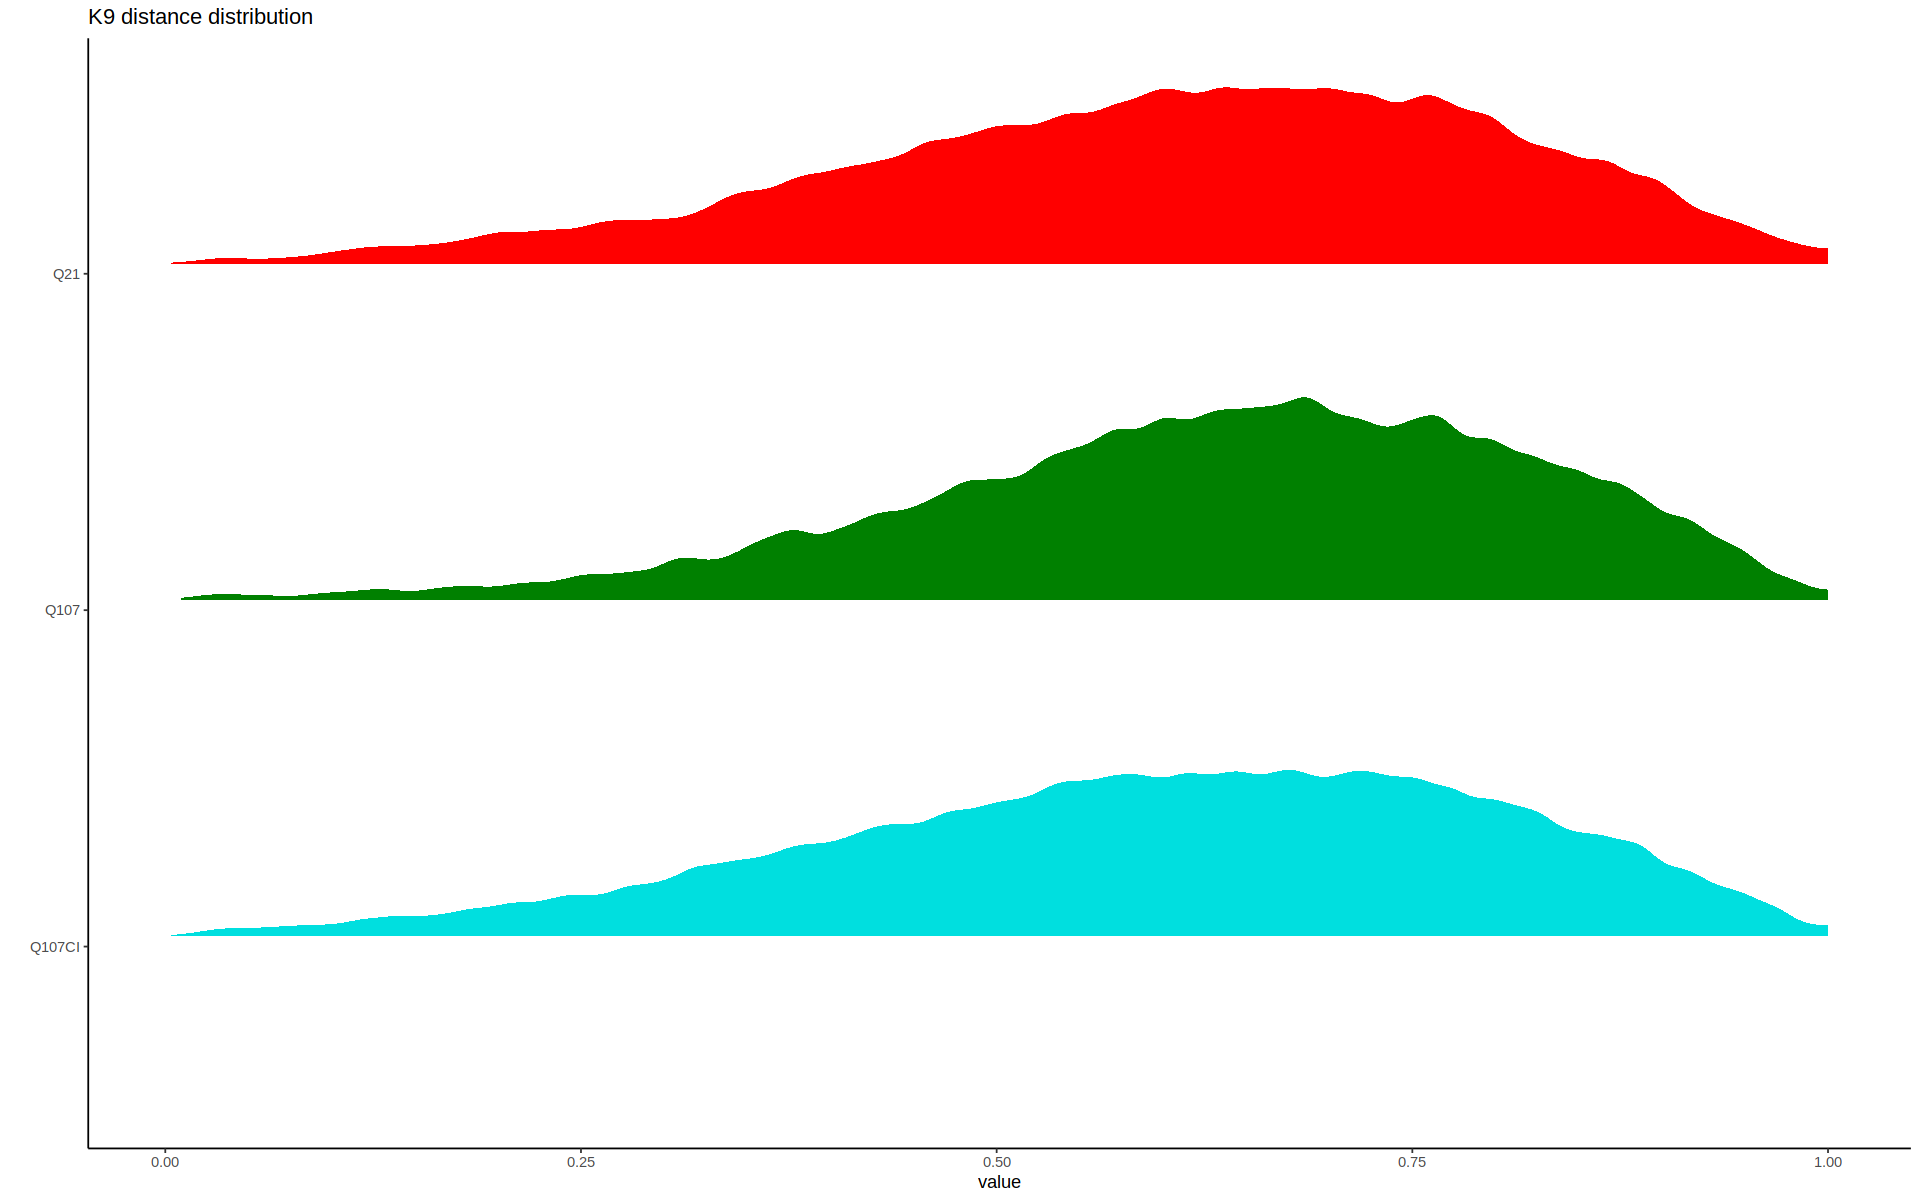

In [101]:
my_pal <- c('#FF0000','#008000','#00DFDF')
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

ggplot(df_final, aes(x = forcats::fct_rev(genotype), y = value, 
                 color = genotype, fill = genotype)) +
  # geom_boxplot(
  #   width = .2, fill = "white",
  #   size = 1.5, outlier.shape = NA
  # ) +
  ggdist::stat_halfeye(
    adjust = .33,
    width = .67, 
    color = NA,
    position = position_nudge(x = .03)
  ) +
  # gghalves::geom_half_point(
  #   side = "l", 
  #   range_scale = .3, 
  #   alpha = .1, size = 1
  # ) +
  coord_flip() +
  # scale_x_discrete(expand = c(.07, .07)) +
  # scale_y_continuous(breaks = 1:9) +
  
  scale_color_manual(values = my_pal, guide = "none") +
  scale_fill_manual(values = my_pal, guide = "none") +
  theme_classic() + 
  xlab('') +
  ggtitle("K9 distance distribution")
ggsave('K9_distribution.pdf', width = 6, height = 7, dpi = 300)

In [37]:
library(ggpubr)

## new RING1 distance

In [45]:
df <- read.table("20240529_RING1_distance.tsv", fill=TRUE, header=TRUE, quote="", sep="\t", encoding="UTF-8")

In [46]:
df %>% str()

'data.frame':	14195 obs. of  8 variables:
 $ Q21_rep1   : chr  "0,94153" "0,70796" "0,67993" "0,66279" ...
 $ Q21_rep2   : chr  "0,46998" "0,53066" "0,60629" "0,51791" ...
 $ Q107_rep1  : chr  "0,94153" "0,70796" "0,67993" "0,66279" ...
 $ Q107_rep2  : chr  "0,7813" "0,32995" "0,44924" "0,39061" ...
 $ Q107_rep3  : chr  "0,85654" "0,60331" "0,73303" "0,58084" ...
 $ Q107CI_rep1: chr  "0,50583" "0,36264" "0,33173" "0,7943" ...
 $ Q107CI_rep2: chr  "0,7514" "0,50712" "0,63895" "0,25839" ...
 $ Q107CI_rep3: chr  "0,56976" "0,56654" "0,64961" "0,55495" ...


In [47]:
columns2numeric <- colnames(df)

In [48]:
for (i in columns2numeric){
  df[[i]] <- as.numeric(sub(",", ".", df[[i]], fixed = TRUE))

}

In [49]:
df_longer <- df %>%
  pivot_longer(cols = everything(), 
               names_to = c(".value", "Condition"), 
               names_sep = "_")

In [50]:
df_longer

Condition,Q21,Q107,Q107CI
<chr>,<dbl>,<dbl>,<dbl>
rep1,0.941530,0.941530,0.505830
rep2,0.469980,0.781300,0.751400
rep3,NA,0.856540,0.569760
rep1,0.707960,0.707960,0.362640
rep2,0.530660,0.329950,0.507120
rep3,NA,0.603310,0.566540
rep1,0.679930,0.679930,0.331730
rep2,0.606290,0.449240,0.638950
rep3,NA,0.733030,0.649610


In [51]:
df_temp <- df_longer %>% pivot_longer(c('Q21','Q107','Q107CI'), names_to = 'genotype')
head(df_temp)

Condition,genotype,value
<chr>,<chr>,<dbl>
rep1,Q21,0.94153
rep1,Q107,0.94153
rep1,Q107CI,0.50583
rep2,Q21,0.46998
rep2,Q107,0.78130
rep2,Q107CI,0.75140


In [52]:
df_temp$bin <- ifelse(df_temp$value <= 0.3 , 'zone1',
                      ifelse(df_temp$value > 0.3 & df_temp$value <= 0.6 , 'zone2', 'zone3'))    


In [53]:
sum(is.na(df_temp))

[1] 104544

In [54]:
df_final <- df_temp %>% drop_na()

In [55]:
df_final %>% head

Condition,genotype,value,bin
<chr>,<chr>,<dbl>,<chr>
rep1,Q21,0.94153,zone3
rep1,Q107,0.94153,zone3
rep1,Q107CI,0.50583,zone2
rep2,Q21,0.46998,zone2
rep2,Q107,0.78130,zone3
rep2,Q107CI,0.75140,zone3


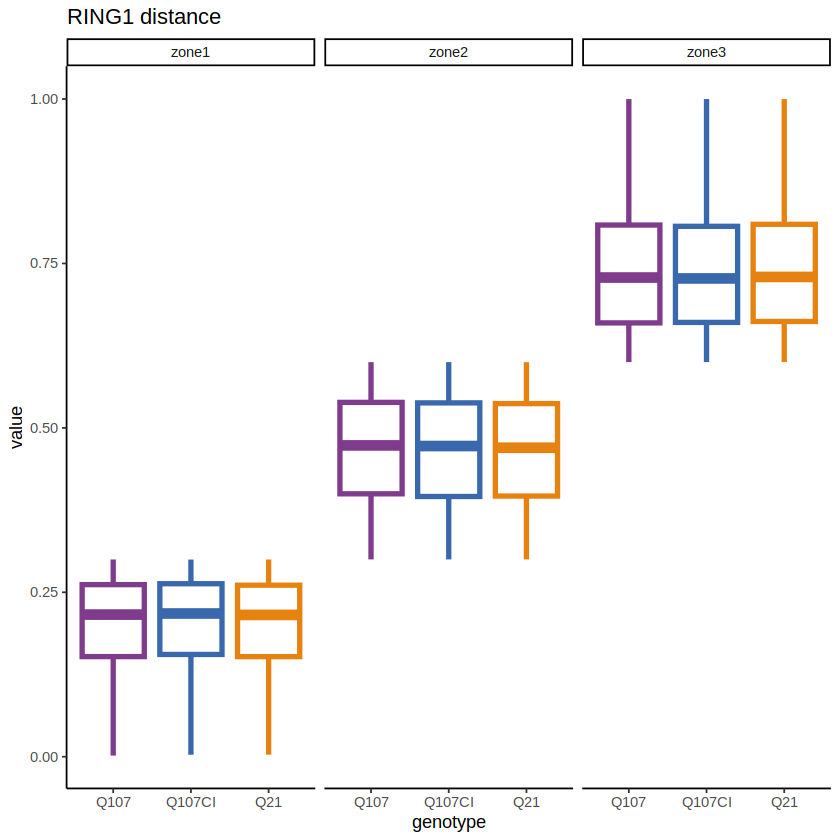

In [56]:
my_pal <- rcartocolor::carto_pal(n = 8, name = "Bold")[c(1, 3, 7, 2)]

df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .8, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("RING1 distance")

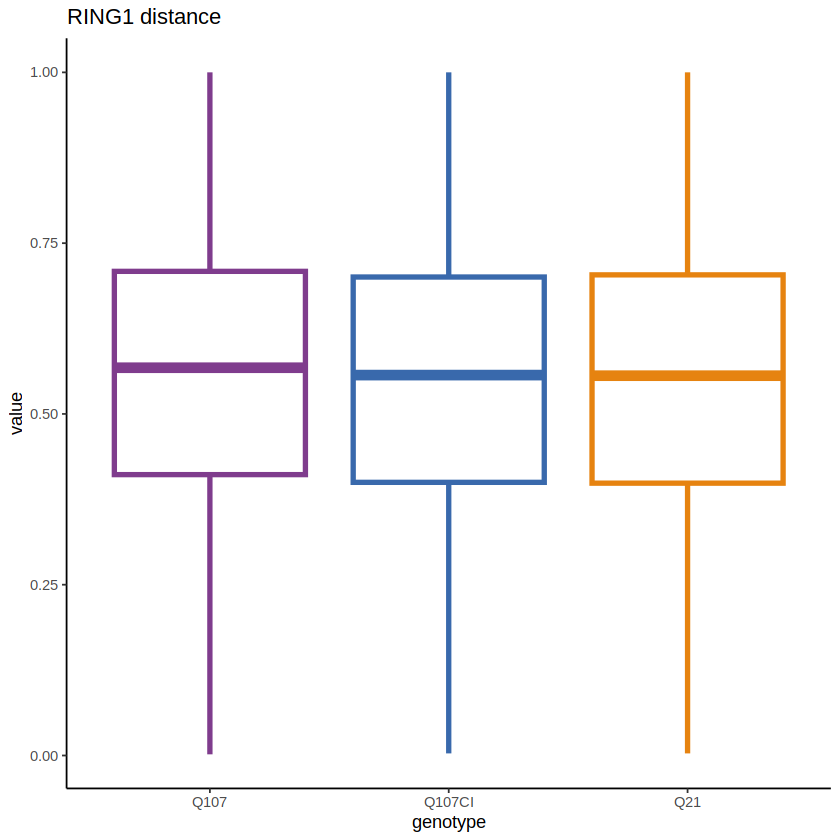

In [57]:
df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .8, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    # facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("RING1 distance")

In [58]:
library(ggdist)

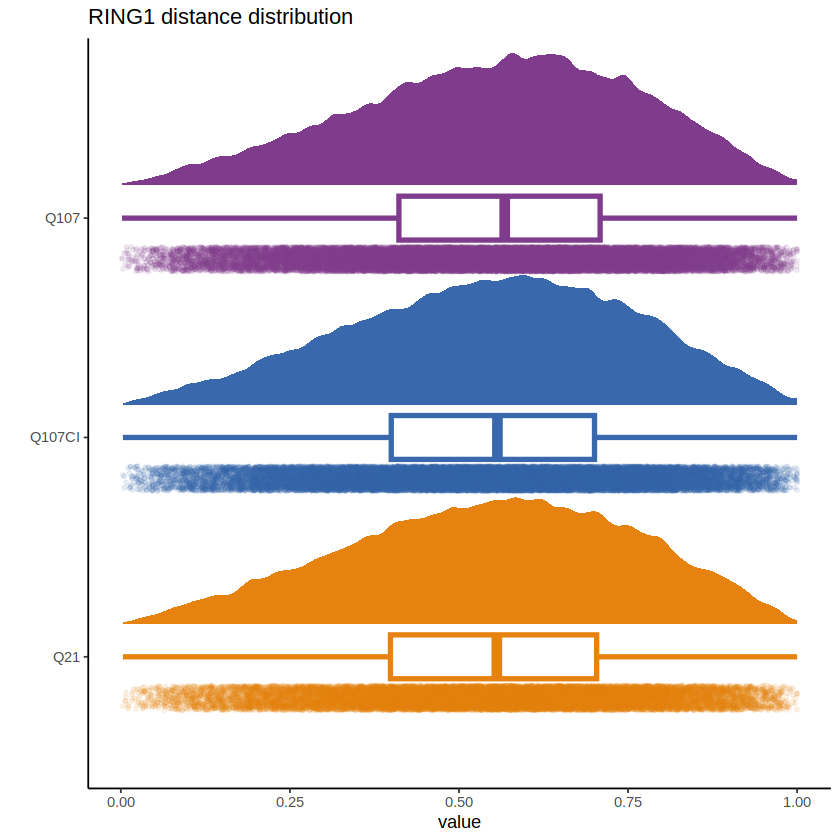

In [59]:
my_pal <- rcartocolor::carto_pal(n = 8, name = "Bold")[c(1, 3, 7, 2)]


ggplot(df_final, aes(x = forcats::fct_rev(genotype), y = value, 
                 color = genotype, fill = genotype)) +
  geom_boxplot(
    width = .2, fill = "white",
    size = 1.5, outlier.shape = NA
  ) +
  ggdist::stat_halfeye(
    adjust = .33,
    width = .67, 
    color = NA,
    position = position_nudge(x = .15)
  ) +
  gghalves::geom_half_point(
    side = "l", 
    range_scale = .3, 
    alpha = .1, size = 1
  ) +
  coord_flip() +
  # scale_x_discrete(expand = c(.07, .07)) +
  # scale_y_continuous(breaks = 1:9) +
  
  scale_color_manual(values = my_pal, guide = "none") +
  scale_fill_manual(values = my_pal, guide = "none") +
  theme_classic() + 
  xlab('') +
  ggtitle("RING1 distance distribution")

In [60]:
library(ggpubr)

In [61]:
Q21_all <- df_final %>% filter(genotype == 'Q21' )
Q107_all <- df_final %>% filter(genotype == 'Q107' )
Q107CI_all <- df_final %>% filter(genotype == 'Q107CI' )

t.test(Q21_all$value, Q107_all$value, alternative= 'less', var.equal = FALSE)
t.test(Q21_all$value, Q107CI_all$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_all$value, Q107CI_all$value, alternative= 'greater', var.equal = FALSE)


	Welch Two Sample t-test

data:  Q21_all$value and Q107_all$value
t = -4.1196, df = 39238, p-value = 1.901e-05
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
         -Inf -0.004775866
sample estimates:
mean of x mean of y 
0.5460113 0.5539615 



	Welch Two Sample t-test

data:  Q21_all$value and Q107CI_all$value
t = -0.22347, df = 39787, p-value = 0.8232
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004288899  0.003411013
sample estimates:
mean of x mean of y 
0.5460113 0.5464502 



	Welch Two Sample t-test

data:  Q107_all$value and Q107CI_all$value
t = 4.3626, df = 56394, p-value = 6.437e-06
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.004679273         Inf
sample estimates:
mean of x mean of y 
0.5539615 0.5464502 


In [62]:
Q21_zone1 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone1')
Q107_zone1 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone1')
Q107CI_zone1 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone1')

In [63]:
t.test(Q21_zone1$value, Q107_zone1$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone1$value, Q107CI_zone1$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone1$value, Q107CI_zone1$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone1$value and Q107_zone1$value
t = -0.076523, df = 5468.6, p-value = 0.939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003684466  0.003407631
sample estimates:
mean of x mean of y 
0.2023627 0.2025011 



	Welch Two Sample t-test

data:  Q21_zone1$value and Q107CI_zone1$value
t = -0.69533, df = 5502.4, p-value = 0.4869
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004849494  0.002310066
sample estimates:
mean of x mean of y 
0.2023627 0.2036324 



	Welch Two Sample t-test

data:  Q107_zone1$value and Q107CI_zone1$value
t = -0.68633, df = 7352.3, p-value = 0.4925
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004362510  0.002099917
sample estimates:
mean of x mean of y 
0.2025011 0.2036324 


In [64]:
Q21_zone2 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone2')
Q107_zone2 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone2')
Q107CI_zone2 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone2')

In [65]:
t.test(Q21_zone2$value, Q107_zone2$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone2$value, Q107CI_zone2$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone2$value, Q107CI_zone2$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone2$value and Q107_zone2$value
t = -1.8853, df = 17520, p-value = 0.0594
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.560258e-03  8.866254e-05
sample estimates:
mean of x mean of y 
0.4642675 0.4665033 



	Welch Two Sample t-test

data:  Q21_zone2$value and Q107CI_zone2$value
t = -0.81565, df = 17743, p-value = 0.4147
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003340350  0.001377235
sample estimates:
mean of x mean of y 
0.4642675 0.4652490 



	Welch Two Sample t-test

data:  Q107_zone2$value and Q107CI_zone2$value
t = 1.1758, df = 24833, p-value = 0.2397
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0008365461  0.0033450259
sample estimates:
mean of x mean of y 
0.4665033 0.4652490 


In [66]:
Q21_zone3 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone3')
Q107_zone3 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone3')
Q107CI_zone3 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone3')

In [67]:
t.test(Q21_zone3$value, Q107_zone3$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone3$value, Q107CI_zone3$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone3$value, Q107CI_zone3$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone3$value and Q107_zone3$value
t = 1.4233, df = 16442, p-value = 0.1547
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0007329612  0.0046202226
sample estimates:
mean of x mean of y 
0.7426066 0.7406630 



	Welch Two Sample t-test

data:  Q21_zone3$value and Q107CI_zone3$value
t = 1.5171, df = 16829, p-value = 0.1293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0006212013  0.0048755910
sample estimates:
mean of x mean of y 
0.7426066 0.7404794 



	Welch Two Sample t-test

data:  Q107_zone3$value and Q107CI_zone3$value
t = 0.15065, df = 24095, p-value = 0.8803
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.002204799  0.002571927
sample estimates:
mean of x mean of y 
0.7406630 0.7404794 


## new gH2AX distance

In [133]:
df <- read.table("20240529_gH2AX_distance.tsv", fill=TRUE, header=TRUE, quote="", sep="\t", encoding="UTF-8")

In [134]:
df %>% str()

'data.frame':	1293 obs. of  10 variables:
 $ Q21_rep1   : chr  "0,18286" "0,65943" "0,27002" "0,28384" ...
 $ Q21_rep2   : chr  "0,7499" "0,40258" "0,19289" "0,7011" ...
 $ Q21_rep3   : chr  "0,35695" "0,64401" "0,13434" "0,16211" ...
 $ Q107_rep1  : chr  "0,60435" "0,83528" "0,25161" "0,47853" ...
 $ Q107_rep2  : chr  "0,25444" "0,0034394" "0,14669" "0,43195" ...
 $ Q107_rep3  : chr  "0,3004" "0,77296" "0,57458" "0,42005" ...
 $ Q107_rep4  : chr  "0,47709" "0,97689" "0,83471" "0,7252" ...
 $ Q107CI_rep1: chr  "0,27653" "0,11573" "0,5116" "0,31442" ...
 $ Q107CI_rep2: chr  "0,46536" "0,31981" "0,57867" "0,44168" ...
 $ Q107CI_rep3: chr  "0,17646" "0,28499" "0,70763" "0,67707" ...


In [135]:
columns2numeric <- colnames(df)

In [136]:
for (i in columns2numeric){
  df[[i]] <- as.numeric(sub(",", ".", df[[i]], fixed = TRUE))

}

In [137]:
df_longer <- df %>%
  pivot_longer(cols = everything(), 
               names_to = c(".value", "Condition"), 
               names_sep = "_")

In [138]:
df_longer

Condition,Q21,Q107,Q107CI
<chr>,<dbl>,<dbl>,<dbl>
rep1,0.182860,0.6043500,0.27653
rep2,0.749900,0.2544400,0.46536
rep3,0.356950,0.3004000,0.17646
rep4,NA,0.4770900,NA
rep1,0.659430,0.8352800,0.11573
rep2,0.402580,0.0034394,0.31981
rep3,0.644010,0.7729600,0.28499
rep4,NA,0.9768900,NA
rep1,0.270020,0.2516100,0.51160


In [139]:
df_temp <- df_longer %>% pivot_longer(c('Q21','Q107','Q107CI'), names_to = 'genotype')
head(df_temp)

Condition,genotype,value
<chr>,<chr>,<dbl>
rep1,Q21,0.18286
rep1,Q107,0.60435
rep1,Q107CI,0.27653
rep2,Q21,0.74990
rep2,Q107,0.25444
rep2,Q107CI,0.46536


In [140]:
df_temp$bin <- ifelse(df_temp$value <= 0.3 , 'zone1',
                      ifelse(df_temp$value > 0.3 & df_temp$value <= 0.6 , 'zone2', 'zone3'))    


In [141]:
sum(is.na(df_temp))

[1] 24906

In [142]:
df_final <- df_temp %>% drop_na()

In [143]:
df_final %>% head

Condition,genotype,value,bin
<chr>,<chr>,<dbl>,<chr>
rep1,Q21,0.18286,zone1
rep1,Q107,0.60435,zone3
rep1,Q107CI,0.27653,zone1
rep2,Q21,0.74990,zone3
rep2,Q107,0.25444,zone1
rep2,Q107CI,0.46536,zone2


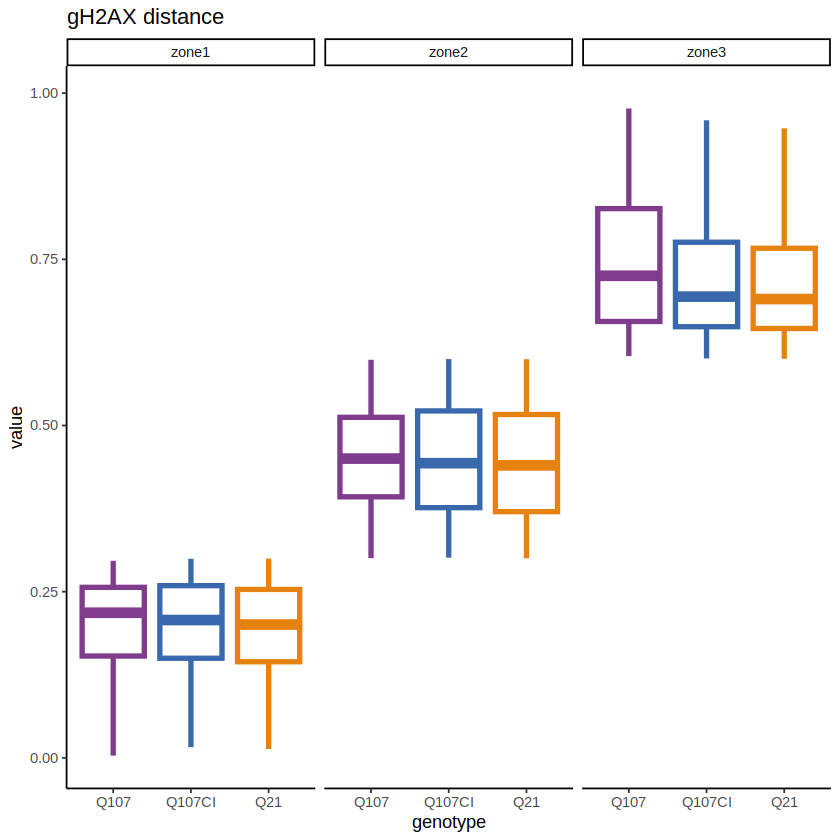

In [144]:
my_pal <- rcartocolor::carto_pal(n = 8, name = "Bold")[c(1, 3, 7, 2)]

df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .8, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("gH2AX distance")

[1] FALSE


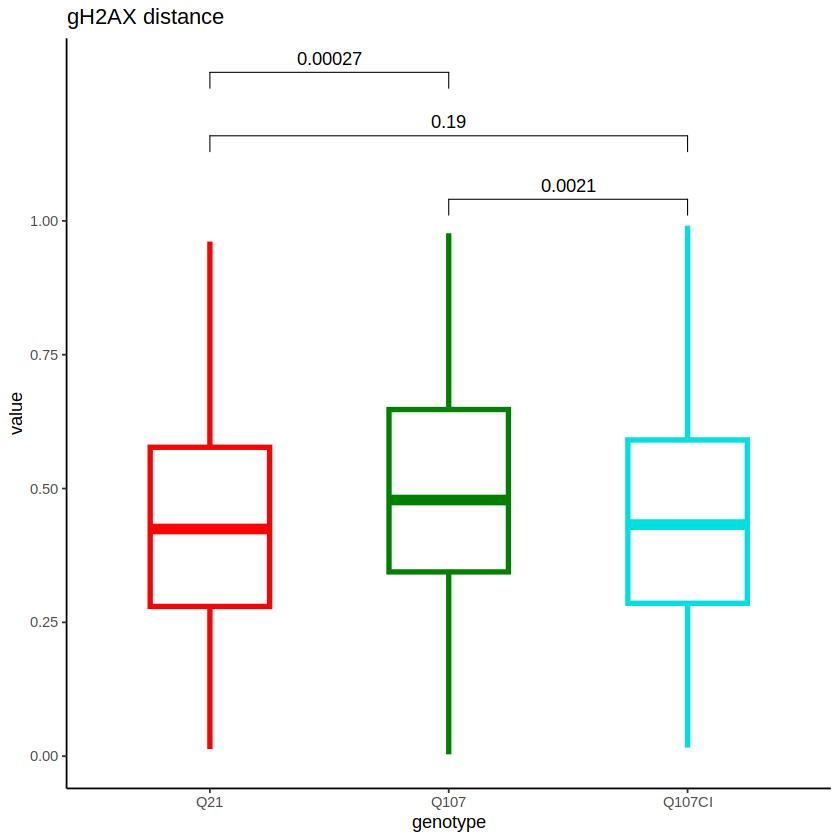

In [145]:
my_pal <- c('#FF0000','#008000','#00DFDF')
df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

df_final %>% ggplot(aes(x=genotype, y=value, color=genotype, fill=genotype)) +
                    geom_boxplot(width = .5, fill = "white", size = 1.5, outlier.shape = NA) +
                    # geom_point() +
                    # facet_wrap(~bin) +
                    scale_color_manual(values = my_pal, guide = "none") +
                    scale_fill_manual(values = my_pal, guide = "none") +
                    theme_classic() +
                    ggtitle("gH2AX distance") +
                    stat_compare_means(
                        method = "t.test", label = "p.format",
                        comparisons=list(c("Q107","Q107CI"),c("Q107CI",'Q21'),c("Q107",'Q21'))
                    ) +
                scale_y_continuous(breaks = c(0,0.25,0.50,0.75,1))

ggsave('gH2AX_boxplot.pdf', width = 4, height = 5, dpi = 300)

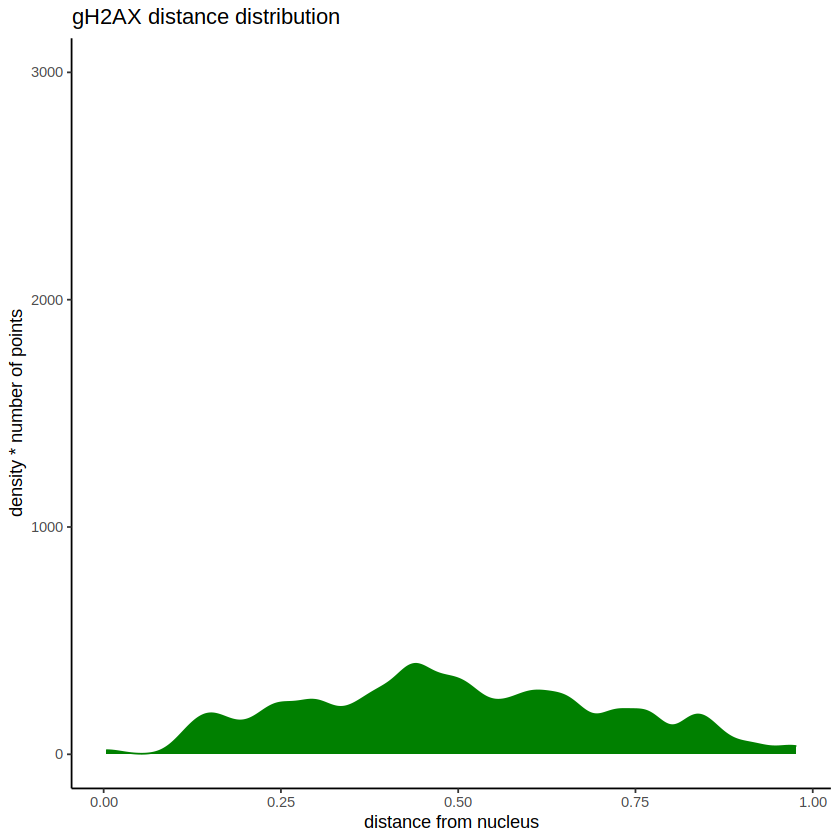

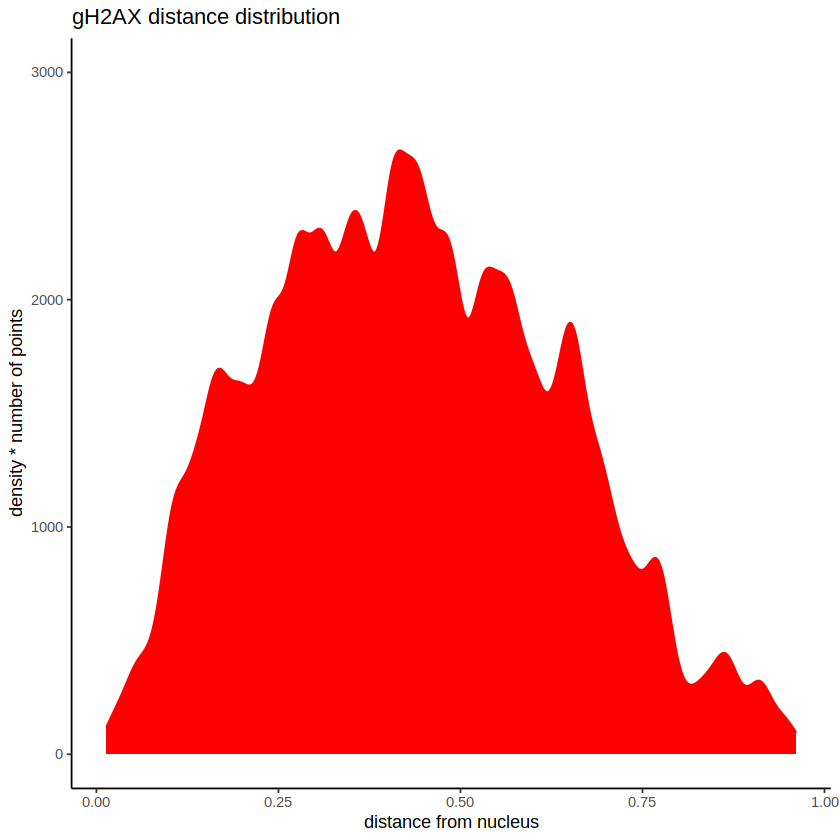

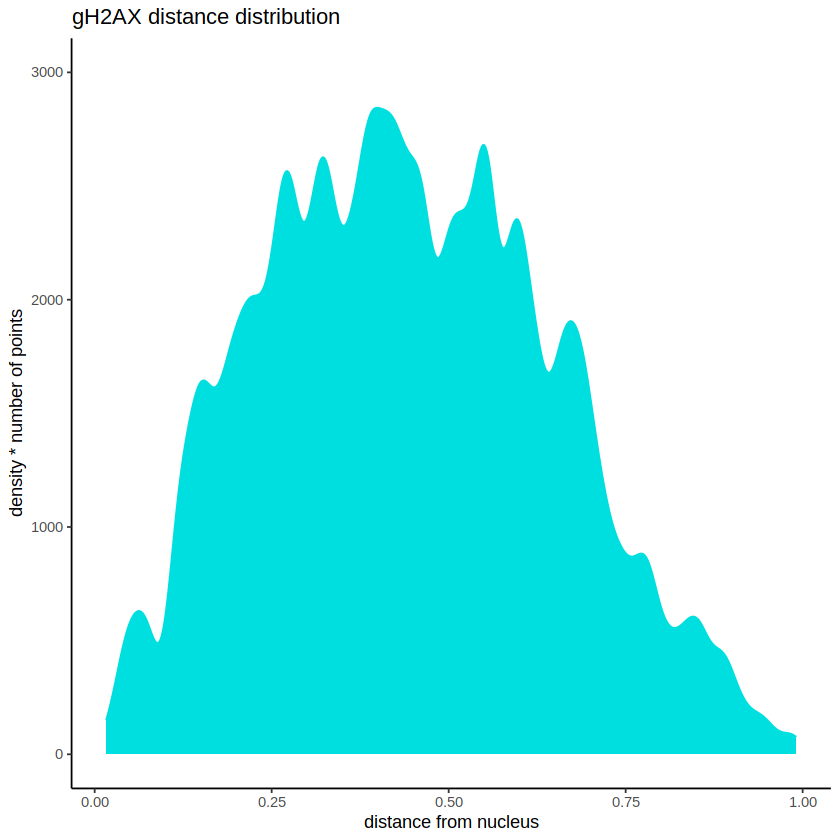

In [148]:
my_pal <- c('Q21' = '#FF0000', 'Q107' = '#008000','Q107CI' = '#00DFDF')
prot <- 'gH2AX'

df_final$genotype <- factor(df_final$genotype, levels=c('Q21', 'Q107', 'Q107CI'))

df_final %>% filter(genotype == 'Q107') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density(adjust = .33) +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,3000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107_distribution.pdf'), width = 7, height = 4, dpi = 300)

df_final %>% filter(genotype == 'Q21') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density(adjust = .33) +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,3000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q21_distribution.pdf'), width = 7, height = 4, dpi = 300)

df_final %>% filter(genotype == 'Q107CI') %>% ggplot(aes(x = value, y = after_stat(count), color = genotype, fill = genotype)) +
                geom_density(adjust = .33) +
                scale_color_manual(values = my_pal, guide = "none") +
                scale_fill_manual(values = my_pal, guide = "none") +
                theme_classic() + 
                ylim(c(0,3000)) +
                xlab('distance from nucleus') +
                ylab('density * number of points') +
                ggtitle(paste0(prot," distance distribution"))

ggsave(paste0(prot,'_Q107CI_distribution.pdf'), width = 7, height = 4, dpi = 300)


In [82]:
library(ggpubr)

In [83]:
Q21_all <- df_final %>% filter(genotype == 'Q21' )
Q107_all <- df_final %>% filter(genotype == 'Q107' )
Q107CI_all <- df_final %>% filter(genotype == 'Q107CI' )

t.test(Q21_all$value, Q107_all$value, alternative= 'less', var.equal = FALSE)
t.test(Q21_all$value, Q107CI_all$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_all$value, Q107CI_all$value, alternative= 'greater', var.equal = FALSE)


	Welch Two Sample t-test

data:  Q21_all$value and Q107_all$value
t = -3.6971, df = 231.25, p-value = 0.0001362
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        -Inf -0.03359921
sample estimates:
mean of x mean of y 
0.4337236 0.4944479 



	Welch Two Sample t-test

data:  Q21_all$value and Q107CI_all$value
t = -1.3061, df = 2846.9, p-value = 0.1916
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.024500727  0.004910048
sample estimates:
mean of x mean of y 
0.4337236 0.4435189 



	Welch Two Sample t-test

data:  Q107_all$value and Q107CI_all$value
t = 3.1153, df = 227.08, p-value = 0.001037
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.02392835        Inf
sample estimates:
mean of x mean of y 
0.4944479 0.4435189 


In [84]:
Q21_zone1 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone1')
Q107_zone1 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone1')
Q107CI_zone1 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone1')

In [85]:
t.test(Q21_zone1$value, Q107_zone1$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone1$value, Q107CI_zone1$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone1$value, Q107CI_zone1$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone1$value and Q107_zone1$value
t = -0.8789, df = 45.402, p-value = 0.3841
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03280373  0.01286866
sample estimates:
mean of x mean of y 
0.1957588 0.2057263 



	Welch Two Sample t-test

data:  Q21_zone1$value and Q107CI_zone1$value
t = -0.3809, df = 783.88, p-value = 0.7034
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.011589483  0.007822736
sample estimates:
mean of x mean of y 
0.1957588 0.1976421 



	Welch Two Sample t-test

data:  Q107_zone1$value and Q107CI_zone1$value
t = 0.71479, df = 44.916, p-value = 0.4784
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01469630  0.03086462
sample estimates:
mean of x mean of y 
0.2057263 0.1976421 


In [86]:
Q21_zone2 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone2')
Q107_zone2 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone2')
Q107CI_zone2 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone2')

In [87]:
t.test(Q21_zone2$value, Q107_zone2$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone2$value, Q107CI_zone2$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone2$value, Q107CI_zone2$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone2$value and Q107_zone2$value
t = -1.1136, df = 113.26, p-value = 0.2678
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02850890  0.00799152
sample estimates:
mean of x mean of y 
0.4437345 0.4539932 



	Welch Two Sample t-test

data:  Q21_zone2$value and Q107CI_zone2$value
t = -0.80653, df = 1420.6, p-value = 0.4201
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.012506900  0.005218888
sample estimates:
mean of x mean of y 
0.4437345 0.4473785 



	Welch Two Sample t-test

data:  Q107_zone2$value and Q107CI_zone2$value
t = 0.72126, df = 111.33, p-value = 0.4723
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01155770  0.02478708
sample estimates:
mean of x mean of y 
0.4539932 0.4473785 


In [88]:
Q21_zone3 <- df_final %>% filter(genotype == 'Q21' & bin == 'zone3')
Q107_zone3 <- df_final %>% filter(genotype == 'Q107' & bin == 'zone3')
Q107CI_zone3 <- df_final %>% filter(genotype == 'Q107CI' & bin == 'zone3')

In [89]:
t.test(Q21_zone3$value, Q107_zone3$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q21_zone3$value, Q107CI_zone3$value, alternative= 'two.sided', var.equal = FALSE)
t.test(Q107_zone3$value, Q107CI_zone3$value, alternative= 'two.sided', var.equal = FALSE)



	Welch Two Sample t-test

data:  Q21_zone3$value and Q107_zone3$value
t = -1.986, df = 77.853, p-value = 0.05055
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.485925e-02  6.719599e-05
sample estimates:
mean of x mean of y 
0.7133475 0.7407436 



	Welch Two Sample t-test

data:  Q21_zone3$value and Q107CI_zone3$value
t = -0.74763, df = 639.46, p-value = 0.455
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01918602  0.00860515
sample estimates:
mean of x mean of y 
0.7133475 0.7186380 



	Welch Two Sample t-test

data:  Q107_zone3$value and Q107CI_zone3$value
t = 1.6146, df = 75.669, p-value = 0.1106
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005164218  0.049375404
sample estimates:
mean of x mean of y 
0.7407436 0.7186380 
